# Multiple Linear Regression: Predicting Local Infection Risk from Global Cyber Threats

### Project Context

This notebook applies core Week 7 concepts—descriptive statistics, visualization, and multiple linear regression—to analyze a real-world cybersecurity dataset.

**Objective:** To build a predictive model that quantifies the relationship between various global cyber threat factors and the resulting local infection rate.

**Data Source:** Data obtained from the research study: [Quantification of the Global Cyber Threat Landscape: An ML-Based Assessment](https://www.mdpi.com/2078-2489/15/4/199).

**Target Variable:** The primary target variable for this model is the **Log-transformed Local Infection** rate. All other variables (such as Log-transformed Spam, Log-Web-Threats, and geographical factors) are used as features to drive the prediction.

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  IPython.display import display
from IPython.display import clear_output
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import PolynomialFeatures

### Data Loading and Initial Checks

In [2]:
# Load data
df = pd.read_csv('cyber_data.csv')
df

AttackDate                                            Country  \
0      11/10/2022 0:00                             Arab Republic of Egypt   
1      11/10/2022 0:00                                 Argentine Republic   
2      11/10/2022 0:00                                              Aruba   
3      11/10/2022 0:00                              Bailiwick of Guernsey   
4      11/10/2022 0:00                                Bailiwick of Jersey   
...                ...                                                ...   
77618  11/12/2023 0:00                               United Arab Emirates   
77619  11/12/2023 0:00  United Kingdom of Great Britain and Northern I...   
77620  11/12/2023 0:00                              United Mexican States   
77621  11/12/2023 0:00                        United Republic of Tanzania   
77622  11/12/2023 0:00                           United States of America   

          Spam  Ransomware  Local Infection  Exploit  Malicious Mail  \
0      0.00090     0.00013          0.01353  0.00013         0.00287   
1      0.00601     0.00006          0.00575  0.00035         0.00058   
2          NaN         NaN          0.01384      NaN         0.00092   
3          NaN         NaN          0.00546  0.00273             NaN   
4      0.00003         NaN          0.00774  0.00101         0.00067   
...        ...         ...              ...      ...             ...   
77618  0.00064     0.00009          0.00901  0.00057         0.00198   
77619  0.01292     0.00003          0.00428  0.00084         0.00021   
77620  0.00500     0.00004          0.00870  0.00019         0.00035   
77621  0.00030     0.00002          0.01201  0.00031         0.00028   
77622  0.21790     0.00003          0.00634  0.00163         0.00020   

       Network Attack  On Demand Scan  Web Threat  Rank Spam  Rank Ransomware  \
0             0.01007         0.01148     0.01708         68               47   
1             0.00095         0.00482     0.00974         27               86   
2                 NaN         0.00830     0.00554        162              143   
3             0.00091         0.00546     0.01001        162              143   
4                 NaN         0.00707     0.01145        138              143   
...               ...             ...         ...        ...              ...   
77618         0.00149         0.00892     0.01274         86               37   
77619         0.00045         0.00382     0.01205         12               89   
77620         0.00106         0.00772     0.00834         34               77   
77621         0.00091         0.00717     0.01145        101              116   
77622         0.00111         0.00578     0.00906          1               89   

       Rank Local Infection  Rank Exploit  Rank Malicious Mail  \
0                        85           176                   34   
1                       174           128                  140   
2                        82           186                  104   
3                       179             1                  186   
4                       150            31                  133   
...                     ...           ...                  ...   
77618                   100            43                    2   
77619                   173            14                   97   
77620                   106           122                   65   
77621                    54            83                   77   
77622                   139             2                  101   

       Rank Network Attack  Rank On Demand Scan  Rank Web Threat  
0                       11                   78               53  
1                      138                  174              160  
2                      187                  119              190  
3                      141                  164              159  
4                      187                  137              146  
...                    ...                  ...       

In [3]:
#summary statistics
df.describe().T

count       mean        std      min       25%  \
Spam                  62982.0   0.006094   0.024337  0.00001   0.00009   
Ransomware            52144.0   0.000130   0.000186  0.00001   0.00004   
Local Infection       74469.0   0.013350   0.008415  0.00024   0.00715   
Exploit               64264.0   0.000469   0.000368  0.00001   0.00021   
Malicious Mail        69184.0   0.001292   0.001606  0.00001   0.00030   
Network Attack        71532.0   0.002222   0.003034  0.00002   0.00070   
On Demand Scan        74231.0   0.009756   0.006080  0.00024   0.00521   
Web Threat            73892.0   0.013006   0.004943  0.00024   0.00970   
Rank Spam             77623.0  94.532986  52.672716  1.00000  48.00000   
Rank Ransomware       77623.0  84.001649  48.976540  1.00000  41.00000   
Rank Local Infection  77623.0  97.725043  58.050769  1.00000  47.00000   
Rank Exploit          77623.0  90.455934  58.979423  1.00000  38.00000   
Rank Malicious Mail   77623.0  96.804942  55.906294  1.00000  48.00000   
Rank Network Attack   77623.0  97.762235  56.900581  1.00000  48.00000   
Rank On Demand Scan   77623.0  97.428584  58.177449  1.00000  47.00000   
Rank Web Threat       77623.0  96.974350  58.454806  1.00000  46.00000   

                           50%         75%        max  
Spam                   0.00059    0.003530    0.30249  
Ransomware             0.00007    0.000140    0.00918  
Local Infection        0.01079    0.017660    0.04937  
Exploit                0.00039    0.000620    0.00466  
Malicious Mail         0.00073    0.001690    0.04322  
Network Attack         0.00129    0.002350    0.05826  
On Demand Scan         0.00814    0.012870    0.12488  
Web Threat             0.01257    0.015973    0.04863  
Rank Spam             98.00000  144.000000  186.00000  
Rank Ransomware       88.00000  131.000000  158.00000  
Rank Local Infection  98.00000  148.000000  196.00000  
Rank Exploit          90.00000  144.000000  188.00000  
Rank Malicious Mail   98.00000  147.000000  194.00000  
Rank Network Attack   98.00000  148.000000  192.00000  
Rank On Demand Scan   97.00000  148.000000  196.00000  
Rank Web Threat       97.00000  148.000000  196.00000

In [4]:
#check total count and nulls counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77623 entries, 0 to 77622
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AttackDate            77623 non-null  object 
 1   Country               77623 non-null  object 
 2   Spam                  62982 non-null  float64
 3   Ransomware            52144 non-null  float64
 4   Local Infection       74469 non-null  float64
 5   Exploit               64264 non-null  float64
 6   Malicious Mail        69184 non-null  float64
 7   Network Attack        71532 non-null  float64
 8   On Demand Scan        74231 non-null  float64
 9   Web Threat            73892 non-null  float64
 10  Rank Spam             77623 non-null  int64  
 11  Rank Ransomware       77623 non-null  int64  
 12  Rank Local Infection  77623 non-null  int64  
 13  Rank Exploit          77623 non-null  int64  
 14  Rank Malicious Mail   77623 non-null  int64  
 15  Rank Network Attack

It can be seen above that there are some, if not, a lot of nulls in the following fields:
- Spam         
- Ransomware   
- Local Infection      
- Exploit   
- Malicious Mail     
- Network Attack         
- On Demand Scan       
- Web Threat           

We can also see that the fields names need to be fixed to ensure that there wouldn't be any issues down the line.

In [5]:
# Check if the counts per category to check if encoding needs to be done.
"""We know from the head() that we can encode Country but we need to check other columns if these can be encoded too."""
[display(df[i].value_counts()) for i in df.columns if df[i].dtype not in ('int64','datetime64[ns]')]

AttackDate
14/10/2023 0:00    205
11/12/2022 0:00    205
21/10/2022 0:00    205
14/08/2023 0:00    204
13/08/2023 0:00    204
                  ... 
18/07/2023 0:00    193
11/11/2023 0:00    193
01/08/2023 0:00    193
16/09/2023 0:00    192
29/07/2023 0:00    185
Name: count, Length: 392, dtype: int64

Country
Arab Republic of Egypt                   392
Argentine Republic                       392
Bailiwick of Jersey                      392
Belize                                   392
Barbados                                 392
                                        ... 
Virgin Islands of the United States        4
State of Eritrea                           3
Federated States of Micronesia             2
Antarctica                                 2
Democratic People's Republic of Korea      2
Name: count, Length: 225, dtype: int64

Spam
0.00001    4698
0.00002    2729
0.00003    2046
0.00004    1660
0.00005    1359
           ... 
0.04840       1
0.17932       1
0.08137       1
0.19277       1
0.03432       1
Name: count, Length: 4139, dtype: int64

Ransomware
0.00003    5973
0.00004    4696
0.00002    4550
0.00006    3966
0.00005    3925
           ... 
0.00161       1
0.00313       1
0.00163       1
0.00184       1
0.00643       1
Name: count, Length: 161, dtype: int64

Local Infection
0.00771    83
0.00595    78
0.00610    77
0.00774    75
0.01006    74
           ..
0.04072     1
0.03867     1
0.04166     1
0.04133     1
0.00086     1
Name: count, Length: 4036, dtype: int64

Exploit
0.00015    1195
0.00016    1171
0.00013    1147
0.00014    1137
0.00011    1102
           ... 
0.00232       1
0.00367       1
0.00411       1
0.00363       1
0.00316       1
Name: count, Length: 332, dtype: int64

Malicious Mail
0.00006    813
0.00021    753
0.00011    748
0.00014    727
0.00009    724
          ... 
0.01366      1
0.01274      1
0.01350      1
0.00849      1
0.01143      1
Name: count, Length: 1125, dtype: int64

Network Attack
0.00055    471
0.00058    440
0.00063    404
0.00083    401
0.00060    399
          ... 
0.01836      1
0.02255      1
0.01257      1
0.02238      1
0.02410      1
Name: count, Length: 2012, dtype: int64

On Demand Scan
0.00483    99
0.00512    98
0.00391    92
0.00474    91
0.00552    91
           ..
0.03480     1
0.02911     1
0.02825     1
0.02737     1
0.02687     1
Name: count, Length: 3012, dtype: int64

Web Threat
0.01231    94
0.01247    92
0.01302    90
0.01186    88
0.01162    88
           ..
0.03065     1
0.02773     1
0.02984     1
0.02781     1
0.03428     1
Name: count, Length: 2904, dtype: int64

[None, None, None, None, None, None, None, None, None, None]

From the list above, we can see that the 'Country' variable is the only variable that we should be encoding.

### Exploratory Data Analysis

#### Univariate Analysis

##### Distributions

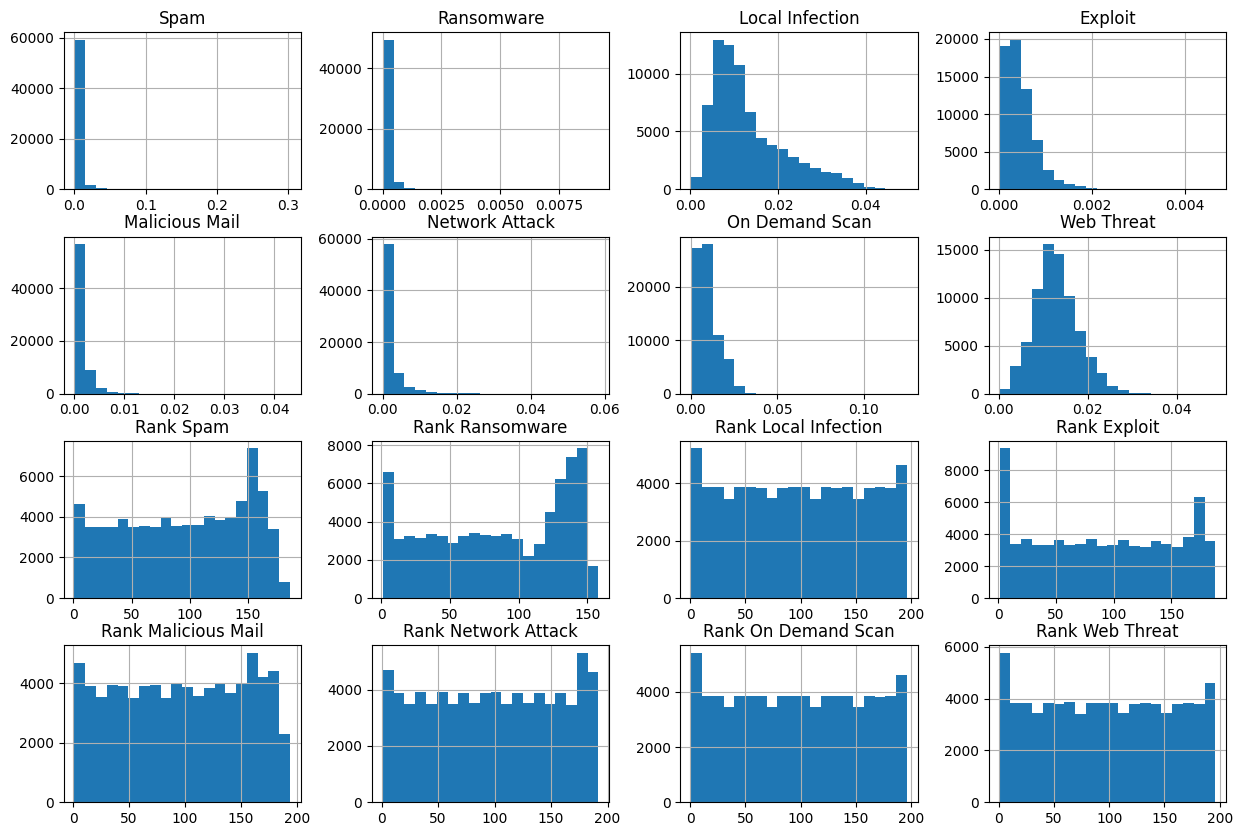

In [6]:
# Show the distributions of each feature
df.hist(bins = 20, figsize = (15,10))
plt.show()

We can see that most of the variables, not including ranking data, are skewed to the right. This information will be useful if there are nulls on said columns. We can also see that the Web Threat column appears to be somewhat Gaussian but it is still skewed to the right. That being said, if imputation is needed for these (if nulls are found), then the median should be used instead of the mean.

The distribution above shows that there is a common pattern where most of the values are non-negative and cannot go below a certain point (0 in this case). It could be hinting that the attacks occur at low frequencies while few events occur at high frequencies.

Rank data here appears to be uniform as expected from ranking data but we may need to check the frequency of the underlying events to further understand if there are reasons why these are spaced out or spread this way.

##### Outlier Checking

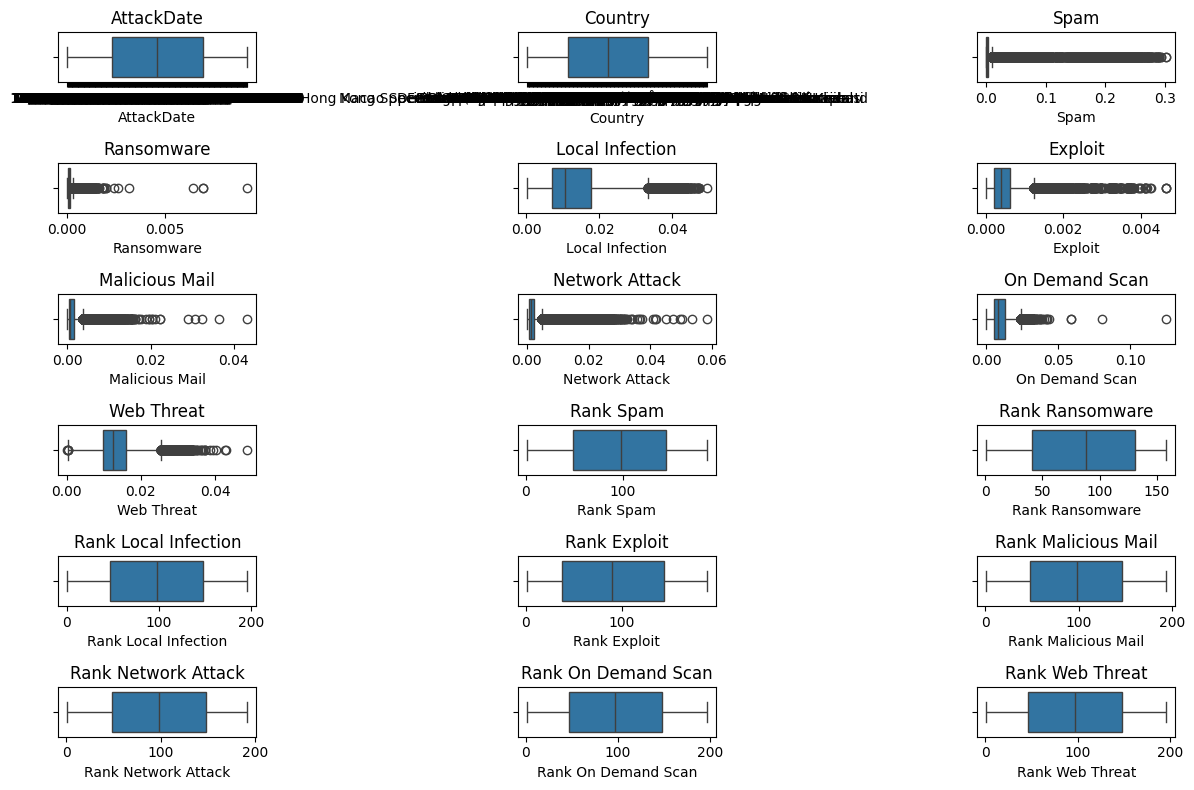

In [7]:
ncols = 3
nrows = int(np.ceil(len(df.columns) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We can see from the boxplots above that there appears to be outliers in Spam, Ransomware, Local Infection, Exploit, Malicious Mail, Network Attack, On Demand Scan, and Web Threat a scompared to the other variables which appear to be more stable. This is expected as the values here vary by the attack it was in. It is possible that the high rate or value is caused by a major attack event but to further understand this, we may need to check further. Once we are able to identify why there are outliers, we can then decide if we can remove the extreme outliers or to transform the data.

We can also use AttackDate and Country here to see if there is a relationship or pattern which could help identify or reveal specific major events.

#### Bivariate Analysis

##### Relationship Checking

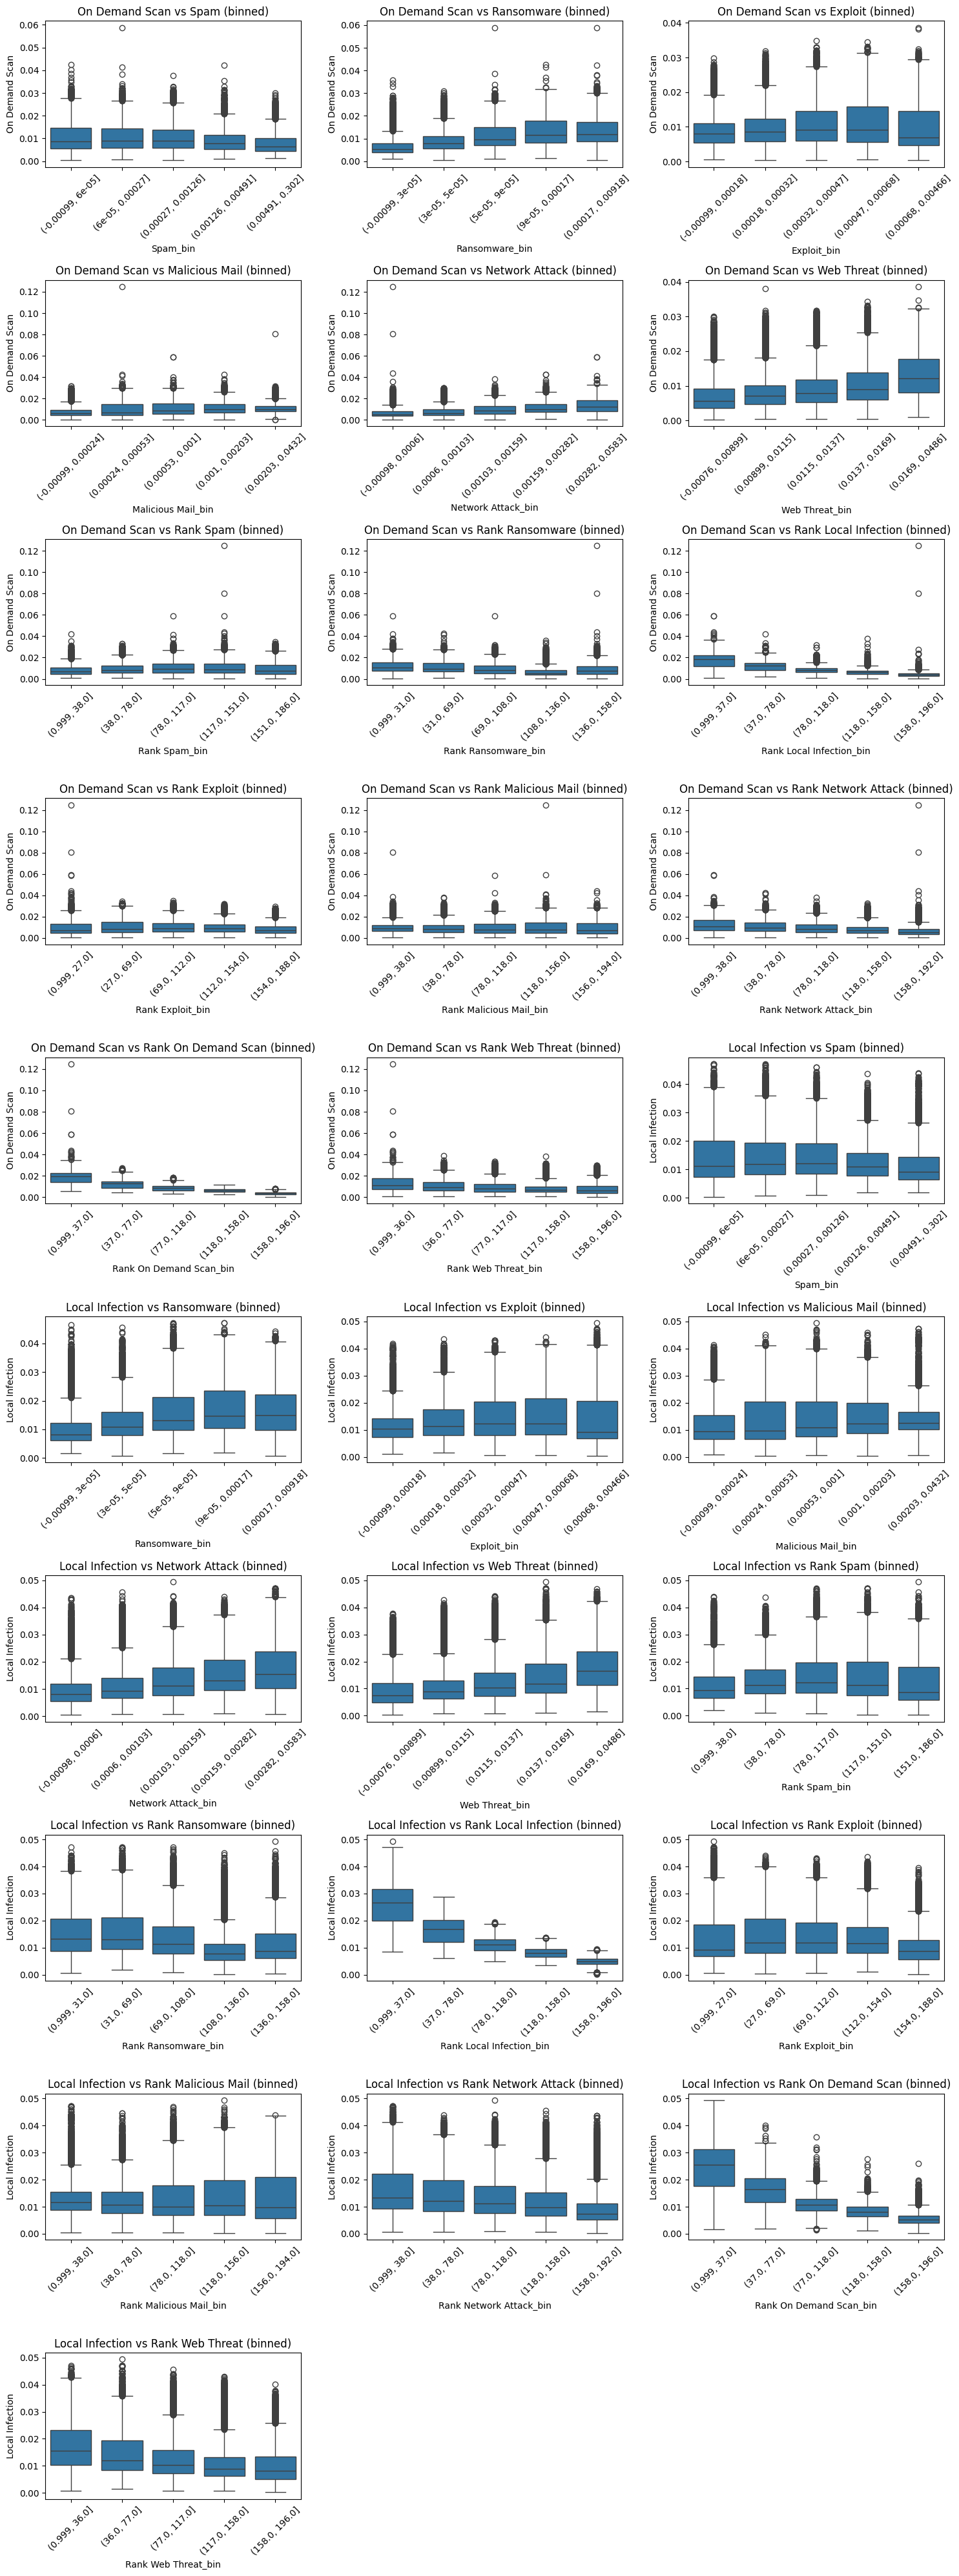

In [8]:
# Check non-linear relationships vs the two target variables
df_binned = df.copy()
exclusion_list = ['AttackDate', 'Country']
excluded_columns = ['On Demand Scan', 'Local Infection'] + exclusion_list
features = [x for x in df_binned if x not in excluded_columns]
target_vars =  list(set(excluded_columns) - set(exclusion_list))

for x in features:
    try:
        df_binned[x + "_bin"] = pd.qcut(df_binned[x], q=5, duplicates="drop")
    except (ValueError, KeyError) as e:
        print(f"Skipping column '{x}' due to an error: {e}")
        continue 

n_plots = len(target_vars) * len(features)
ncols = 3
nrows = int(np.ceil(n_plots / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 4))
axes = axes.flatten()

plot_idx = 0
for target in target_vars:
    for x in features:
        if plot_idx < len(axes):
            sns.boxplot(
                x=df_binned[x + "_bin"], 
                y=df_binned[target], 
                ax=axes[plot_idx]
            )
            axes[plot_idx].set_title(f"{target} vs {x} (binned)")
            axes[plot_idx].tick_params(axis='x', rotation=45)
            plot_idx += 1
        else:
            break
    if plot_idx >= len(axes):
        break

for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()


Looking at the boxplots, it shows an increasing or decreasing trend in the median of the target variables across the bins of the other features, which is indicative of a relationship. The fact that the boxplots don't show a perfectly straight line suggests that while there is an overall monotonic trend, the relationship might not be strictly linear.

To further understand this, we must check the correlation here. As we have seen in previous charts, the skewness and outliers shows us that we may need to use Spearman's correlation here instead of Pearson's as the latter might underestimate the true relationship. The usage of said correlation will also help detect trends even if they are not perfectly linear.

##### Correlation

In [9]:
# Since we are only using the nummeric data, lets create a new df and drop the non-numeric columns first.
df_corr = df.copy()
to_drop = [x for x in df_corr.columns if 'Rank' in x]
print(to_drop)
df_corr = df_corr.drop(['AttackDate', 'Country'], axis = 1)
df_corr = df_corr.drop(to_drop, axis = 1)
df_corr.columns

['Rank Spam', 'Rank Ransomware', 'Rank Local Infection', 'Rank Exploit', 'Rank Malicious Mail', 'Rank Network Attack', 'Rank On Demand Scan', 'Rank Web Threat']


Index(['Spam', 'Ransomware', 'Local Infection', 'Exploit', 'Malicious Mail',
       'Network Attack', 'On Demand Scan', 'Web Threat'],
      dtype='object')

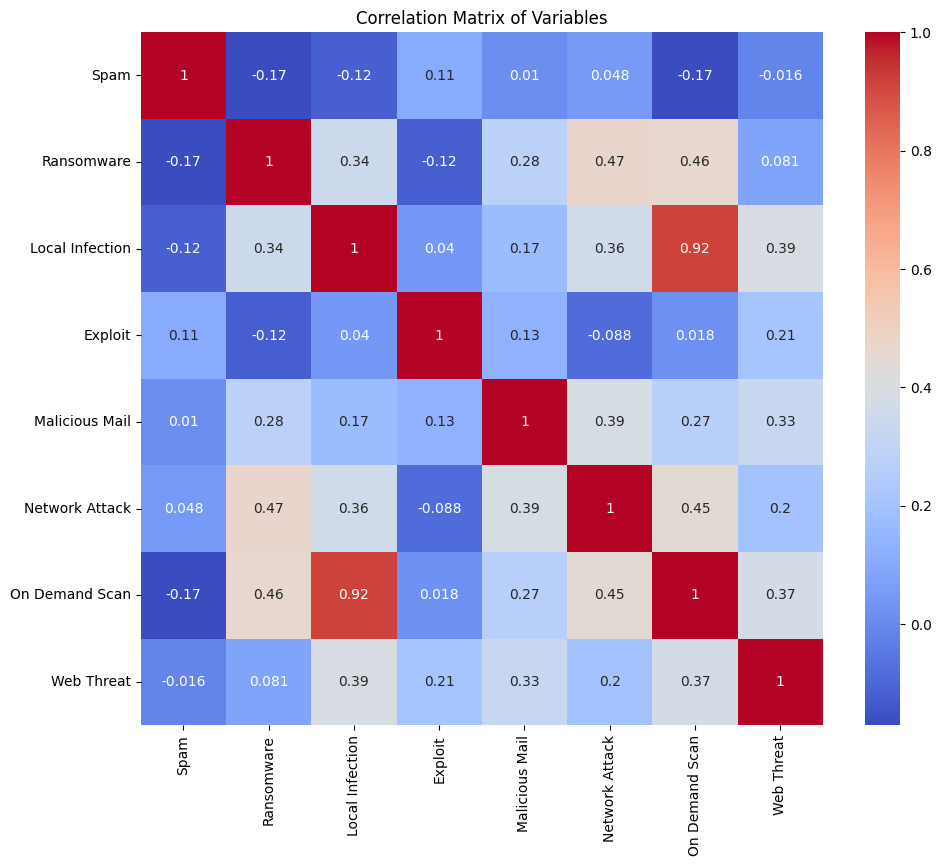

In [10]:
# Correlation Heatmap to show the relationship between the features and target variables.
plt.figure(figsize = (11,9))
sns.heatmap(df_corr.corr(method = 'spearman'),
            annot = True,
            cmap = 'coolwarm'
            # ,
            # fmt = '.2f'
            )
plt.title('Correlation Matrix of Variables')
plt.show()

I've chosen Spearman's rank correlation here as I believe that it is the most appropriate method to analyze the relationships given what we've seen in previous charts. We found that the data is heavily right-skewed and contain's many outliers. If Pearson will be used, the result might be misleading as this method is sensitive to outliers and assumes that data is normally distributed and as with what we've seen in the distributions, that is not the case. 

We've also seen in the boxplots that the relationships are rather monotonic (consistenly increasing or decreasing but not strictly linear). Spearman will allow us to measure the strength and direction of the relationship, making it a more accurate choice considering the data that we have.

#####

##### Pairplot

In [11]:
# Show pairwise relationships between the variables, rank data will also be removed
# Due to size, lets just do a sample

df_sample = df.sample(n = 5000, random_state = 1)
vars_raw = [col for col in df_sample.columns if 'Rank' not in col]
targets_raw = ['AttackDate', 'Country']
vars = [col for col in vars_raw if col not in ['AttackDate', 'Country']]
print(vars)

['Spam', 'Ransomware', 'Local Infection', 'Exploit', 'Malicious Mail', 'Network Attack', 'On Demand Scan', 'Web Threat']


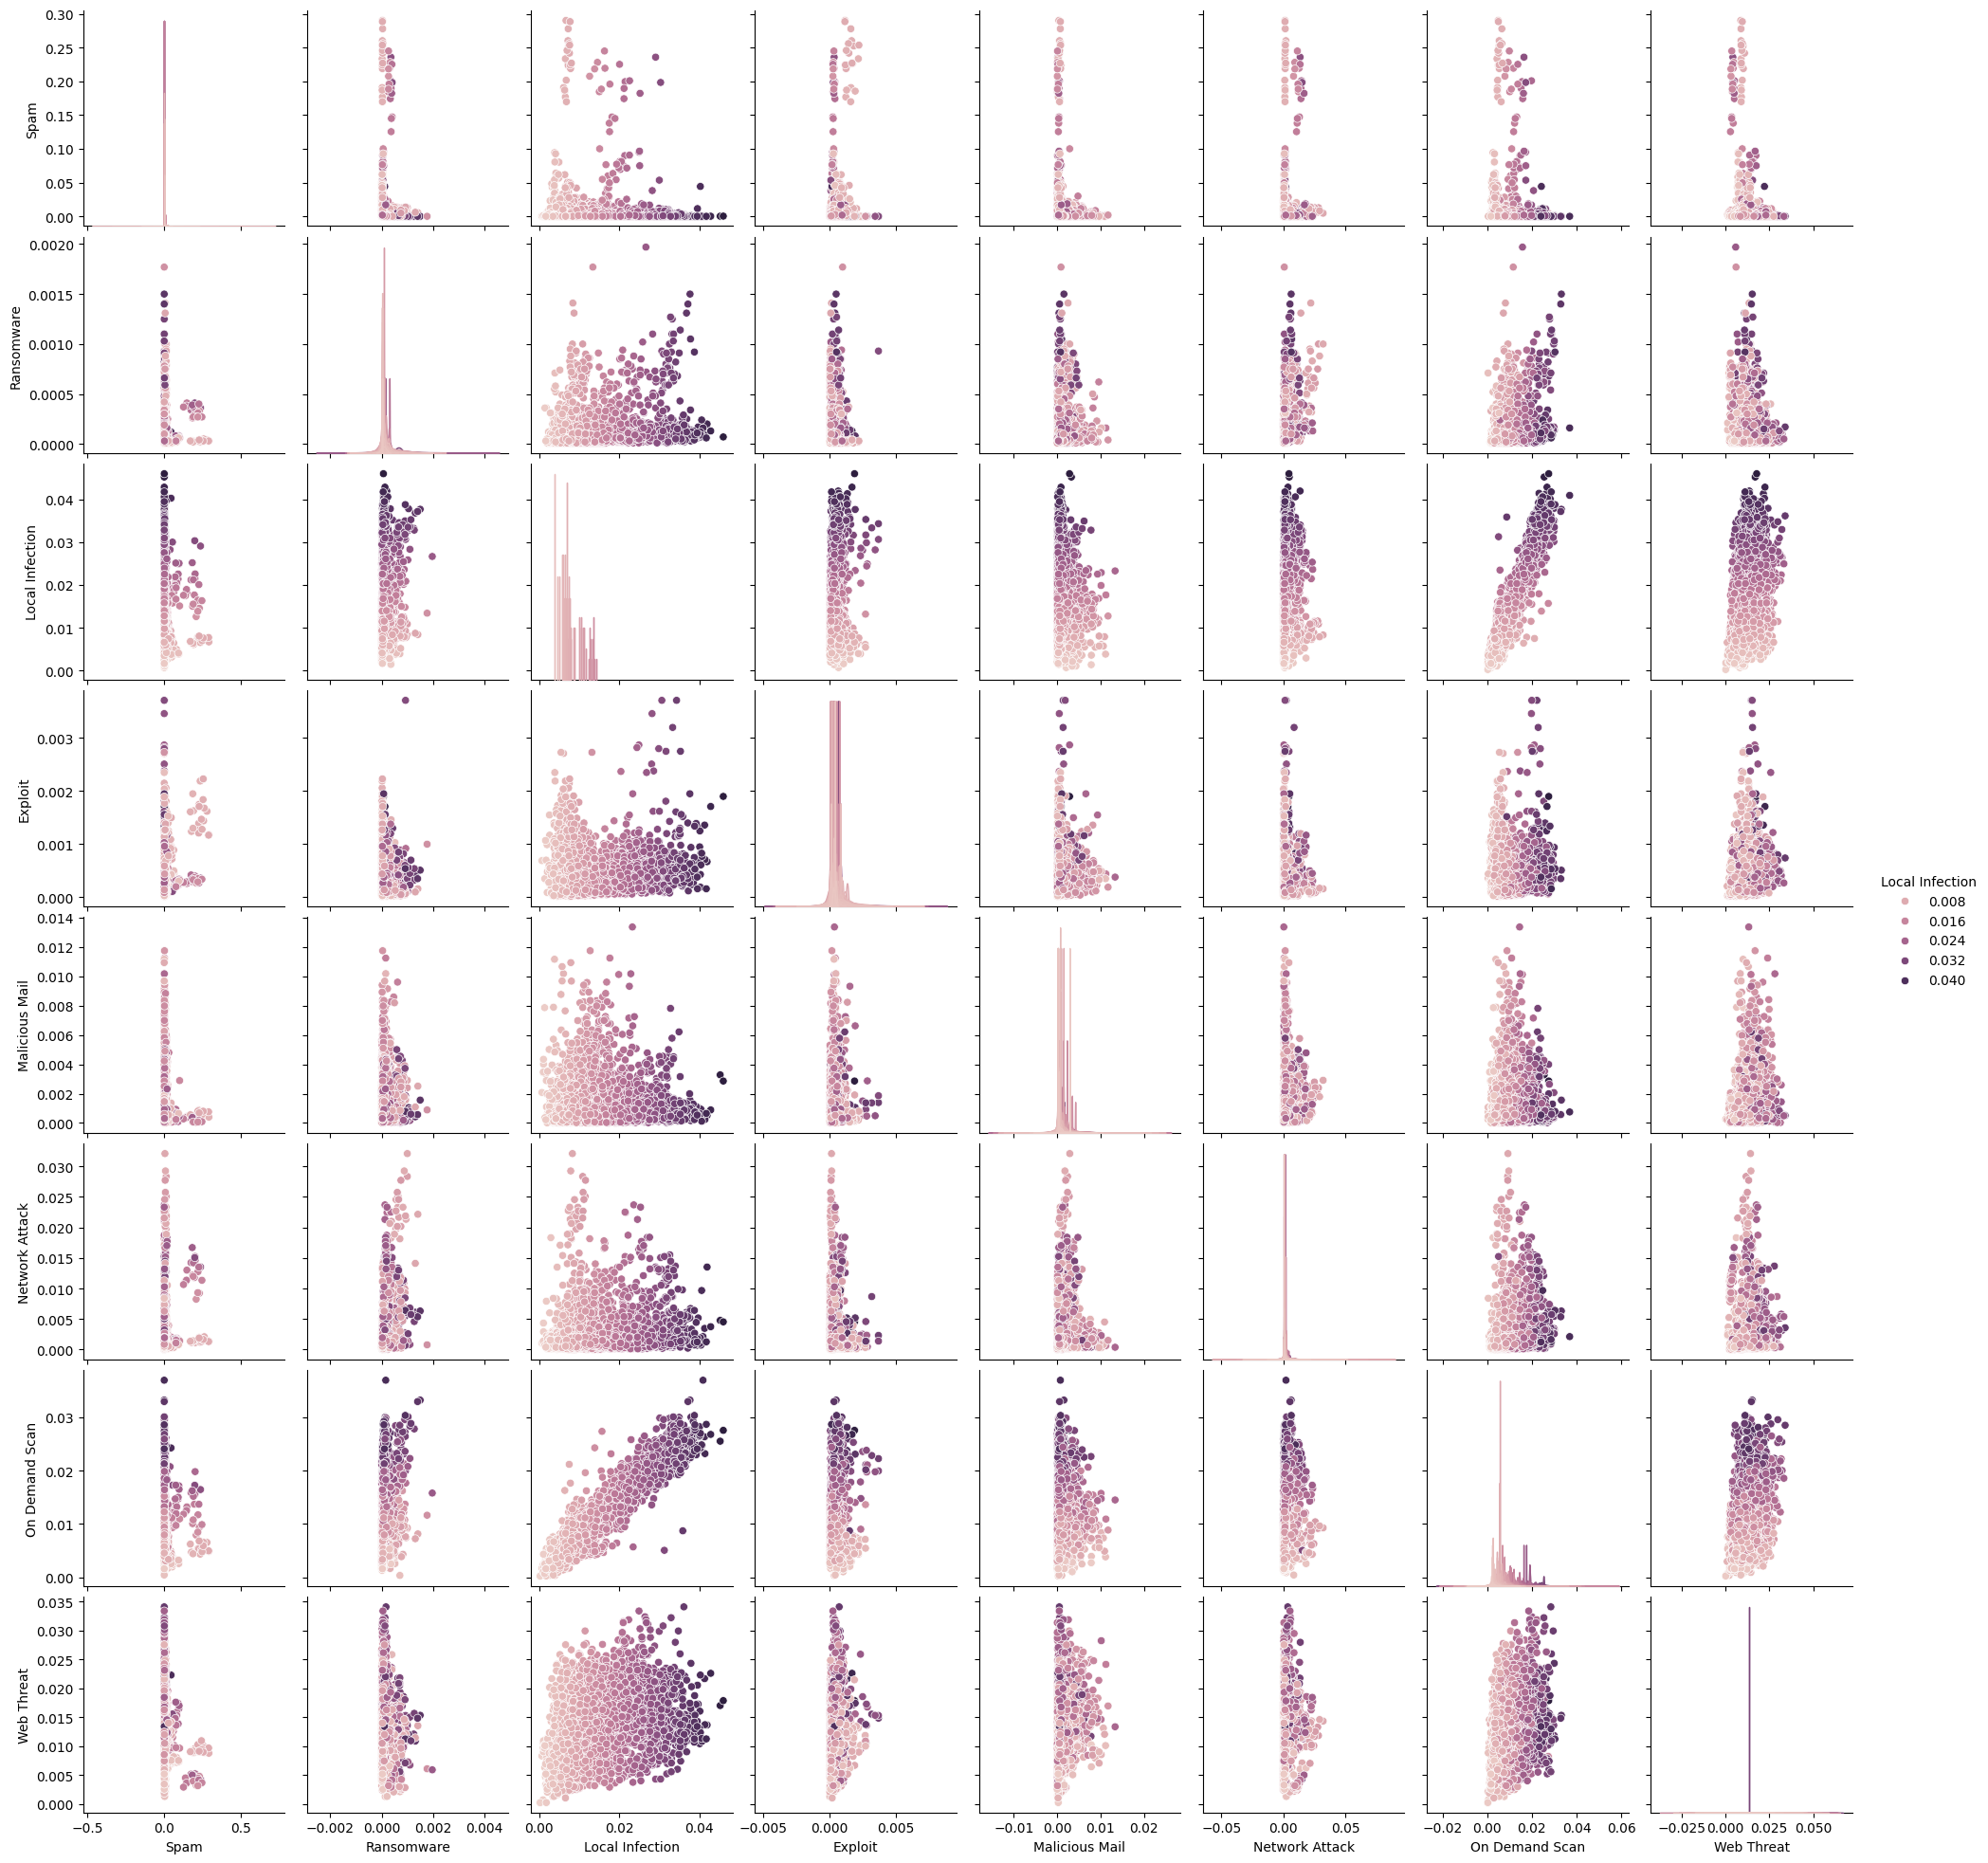

In [12]:
# Pairplot for Local Infection
sns.pairplot(df_sample,
             vars = vars,
             hue = 'Local Infection'
             )
plt.show()

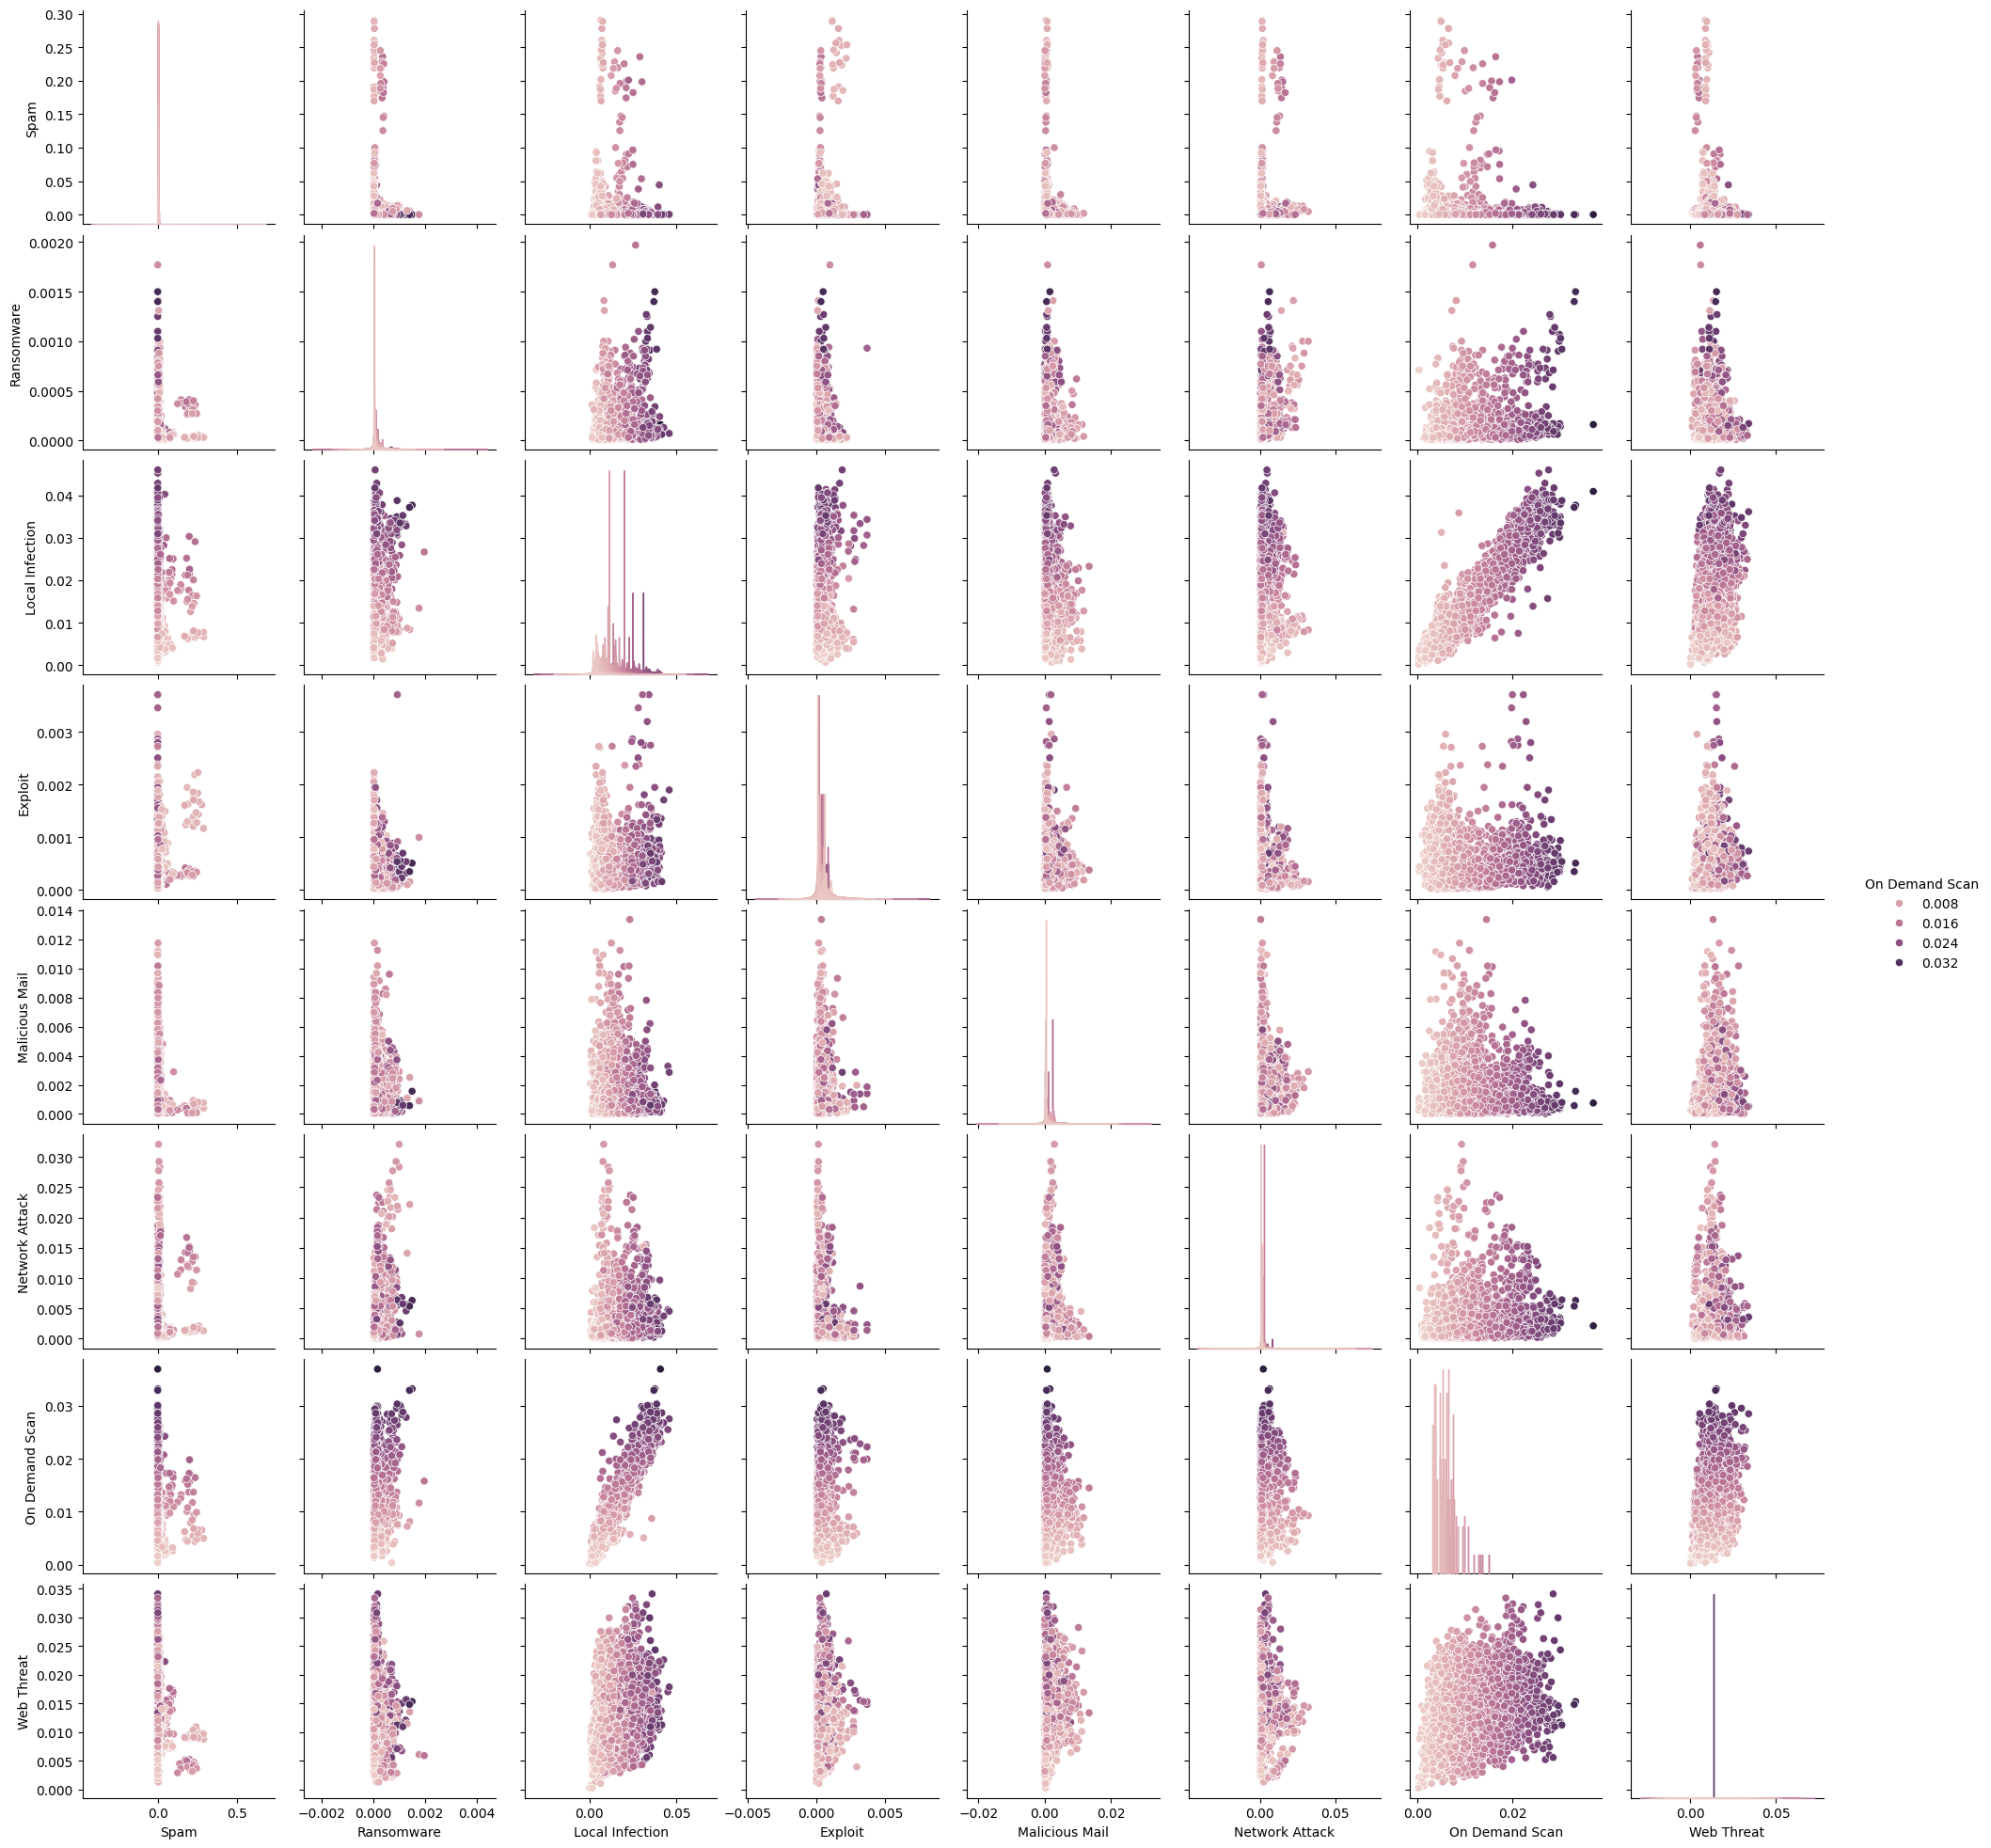

In [13]:
# Pairplot for On Demand Scan
sns.pairplot(df_sample,
             vars = vars,
             hue = 'On Demand Scan'
             )

plt.show()

Looking at both pairplots with each focus, we can see that there exists a strong positive correlation between Local Infection and On Demand Scan which suggest a possible multicollinearity. We can also see that most pairs exhibit weak or moderate correlations as seen with the data being spread out and dominated by the high concentration of low values which furhter confirms the skewness we have seen previously. 

##### Scatterplot

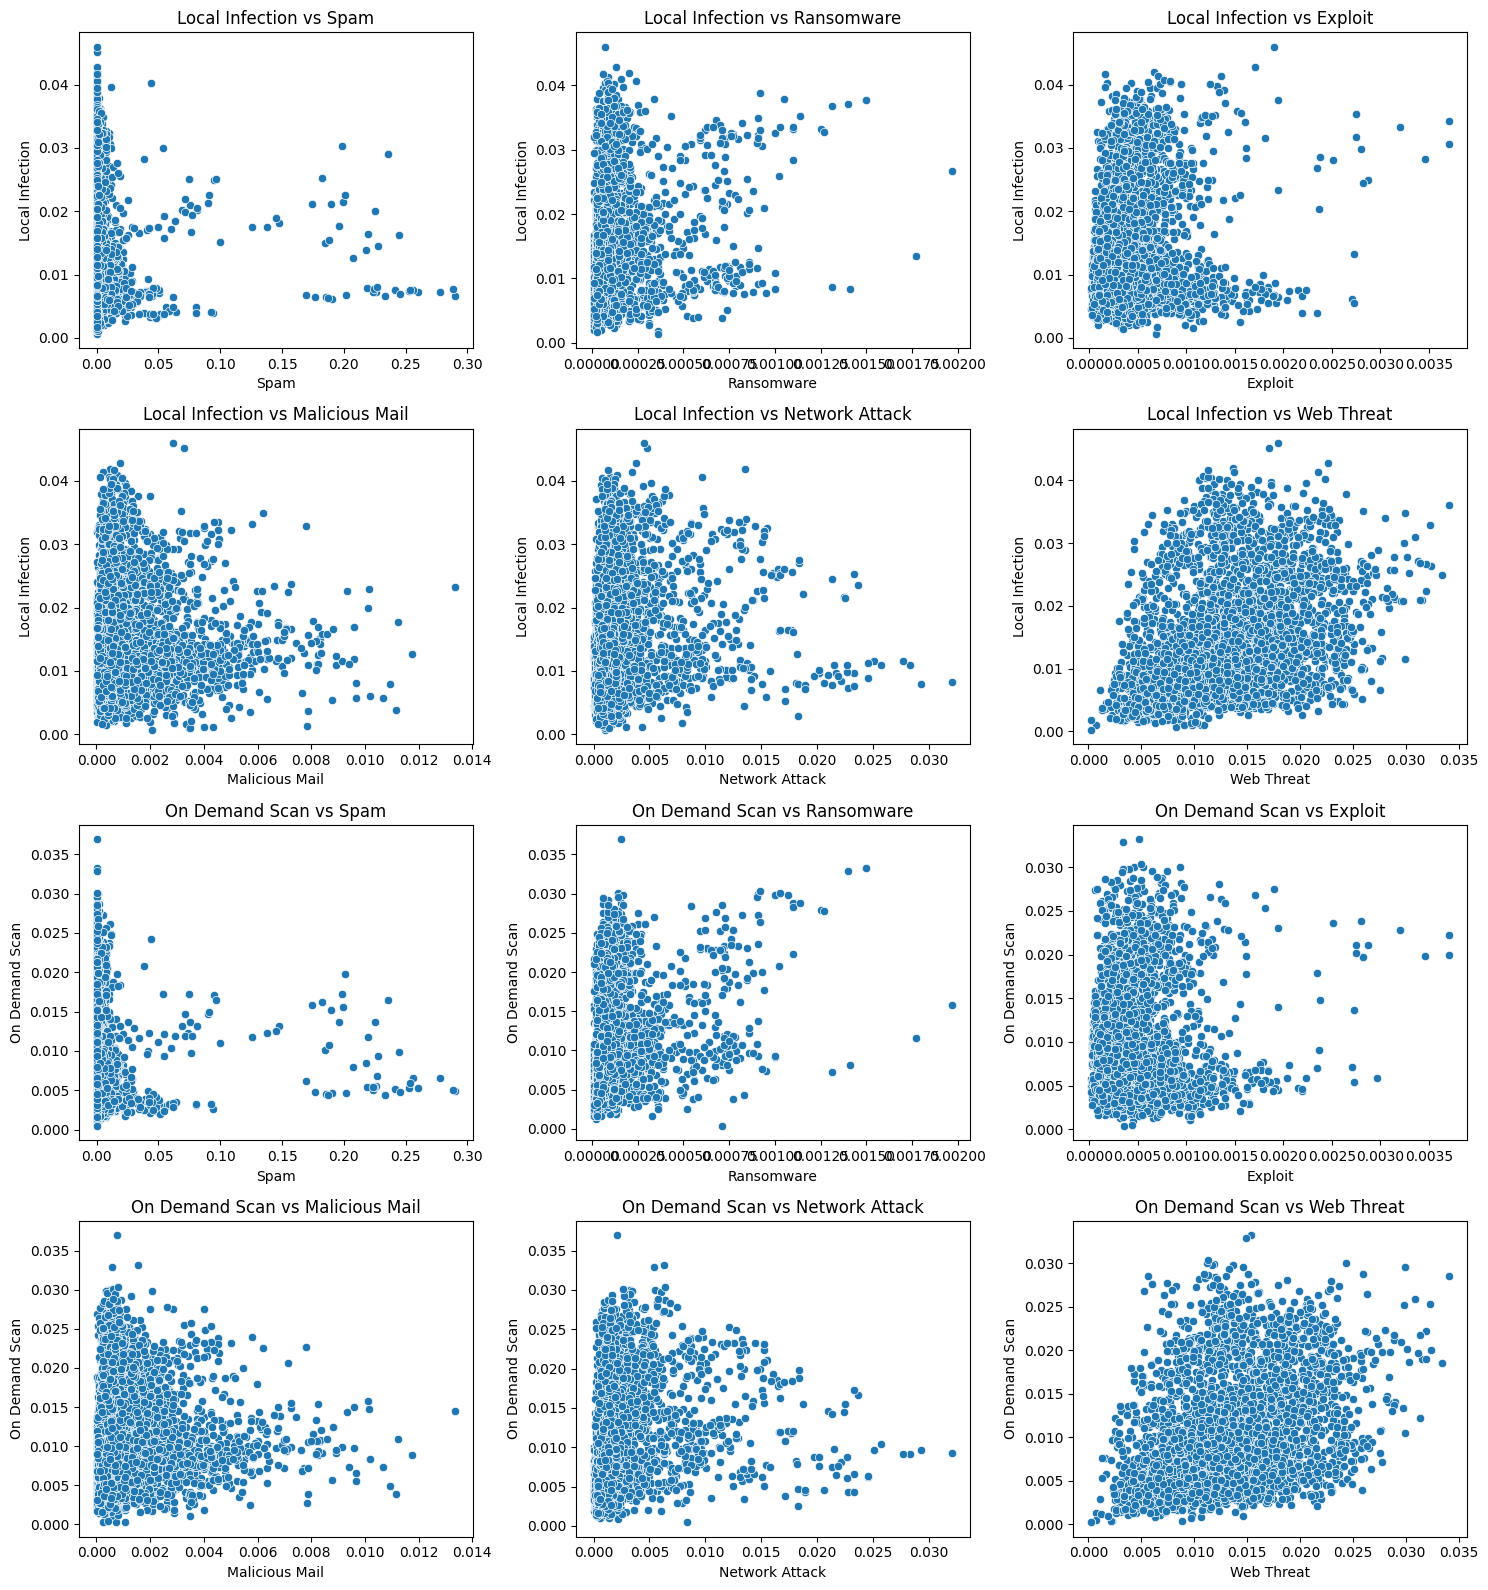

In [14]:
target_length = len(targets_raw)
features_length = len(vars)

feature_cols = ['Spam', 'Ransomware', 'Exploit', 'Malicious Mail', 'Network Attack', 'Web Threat']
target_cols = ['Local Infection', 'On Demand Scan']

nplots = len(target_cols) * len(feature_cols)
ncols = 3
nrows = -(-nplots // ncols) 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4*nrows))
axes = axes.flatten()

plot_idx = 0
for t in target_cols:
    for f in feature_cols:
        sns.scatterplot(x=f, y=t, data=df_sample, ax=axes[plot_idx])
        axes[plot_idx].set_title(f"{t} vs {f}")
        plot_idx += 1

for ax in axes[plot_idx:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


in the focused scatterplots, we can see and confirm that the dense concentration on low values are observed. The charts for both Local Infection and On Demand Scan are almost rather similar which affirms the decision to drop the latter to focus on the effect of said attacks to Local Infection.

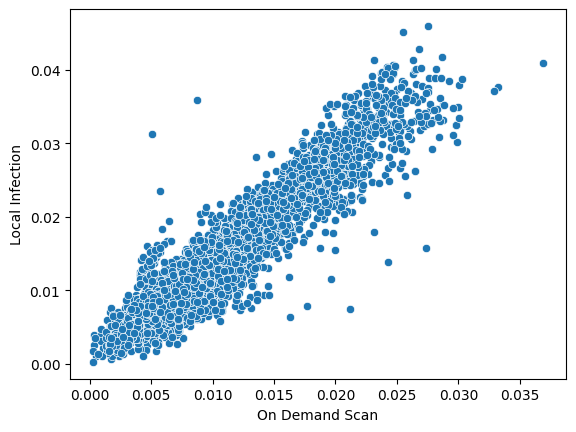

In [15]:
sns.scatterplot(x = 'On Demand Scan', y = 'Local Infection',
                data = df_sample)
plt.show()

We can see that there exists a strong positive correlation between Local Infection and On Demand Scan and this can be attributed to the idea that the local infection rate increases every time an on demand scan is made. With this, we can say that we can select either of the two to prevent multicollinearity and to ensure that there is no redundancy and that the model will be stable.

In this case, local infection might be the logical option as the on demand scan is driven by the defending side. Since the features are from the attacking side, we would want to assess the infection rate in order to fully understand the effects of these attacks towards the infection level.

### Data Cleaning

In [16]:
#Make a copy of the dataframe for cleaning and to serve as a savepoint
df_cleaned = df.copy()

From the issues found above, these are the things to be done to clean the data:
- Dropping of Rank Variables and On Demand Scan
- Renaming of variables
- Handling of nulls

##### Dropping of Rank Variables and On Demand Scan

In [17]:
cols_to_drop = [x for x in df_cleaned.columns if 'Rank' in x]
cols_to_drop = cols_to_drop + ['On Demand Scan']
cols_to_drop

['Rank Spam',
 'Rank Ransomware',
 'Rank Local Infection',
 'Rank Exploit',
 'Rank Malicious Mail',
 'Rank Network Attack',
 'Rank On Demand Scan',
 'Rank Web Threat',
 'On Demand Scan']

In [18]:
df_cleaned = df_cleaned.drop(columns = cols_to_drop, axis = 1)
df_cleaned.columns

Index(['AttackDate', 'Country', 'Spam', 'Ransomware', 'Local Infection',
       'Exploit', 'Malicious Mail', 'Network Attack', 'Web Threat'],
      dtype='object')

##### Renaming of variables

In [19]:
"""Column names before cleaning:"""
print(df.columns)
print("-" * 50)

# Fix the names by replacing spaces with underscore
fixed_names = {col: col.replace(' ', '_') for col in df_cleaned.columns}
df_cleaned.rename(columns = fixed_names, inplace = True)

"""Column names after cleaning:"""
print(df_cleaned.columns)

Index(['AttackDate', 'Country', 'Spam', 'Ransomware', 'Local Infection',
       'Exploit', 'Malicious Mail', 'Network Attack', 'On Demand Scan',
       'Web Threat', 'Rank Spam', 'Rank Ransomware', 'Rank Local Infection',
       'Rank Exploit', 'Rank Malicious Mail', 'Rank Network Attack',
       'Rank On Demand Scan', 'Rank Web Threat'],
      dtype='object')
--------------------------------------------------
Index(['AttackDate', 'Country', 'Spam', 'Ransomware', 'Local_Infection',
       'Exploit', 'Malicious_Mail', 'Network_Attack', 'Web_Threat'],
      dtype='object')


##### Handling of Nulls

In [20]:
"""
Earlier, we found that the columns below have nulls. 
To determine the best approach on how to handle this, we need to: 
- Consider the level of completeness first to see if we can drop all rows where there are nulls.
- Check if we can apply imputation and which type of imputation.
"""

null_list = [
            'Spam',
            'Ransomware',
            'Local_Infection',
            'Exploit',
            'Malicious_Mail',
            'Network_Attack',
            'Web_Threat',
]
null_list

# Make a copy of the df where only those in null_list exist for ease of use.
df_nulls = df_cleaned[null_list] 

In [21]:
# Check if rows can be fully dropped.
complete_vals = df_cleaned.dropna().shape[0]
count_all = df_cleaned.shape[0]

percentage_complete = complete_vals / float(count_all)
print(f"Count of rows with values on all variables are {complete_vals} out of {count_all}.")
print(f"A percentage difference of {percentage_complete} is observed.")
      

Count of rows with values on all variables are 44277 out of 77623.
A percentage difference of 0.570410831841078 is observed.


From the results above, we can see that if this method was done, we risk losing the entire dataset. With this, we can conclude that every row has at least one null value thus we can either do the following: 
- Imputation
- Dropping columns that have a high percentage of null values


In [22]:
# Then let's check the central tendencies for each
df_nulls.isnull().mean()*100

Spam               18.861678
Ransomware         32.824034
Local_Infection     4.063229
Exploit            17.210105
Malicious_Mail     10.871778
Network_Attack      7.846901
Web_Threat          4.806565
dtype: float64

Looking at the list above, we have the percentage of nulls to total count per column. We need to re-check the distributions here first to determine which imputation method is best.

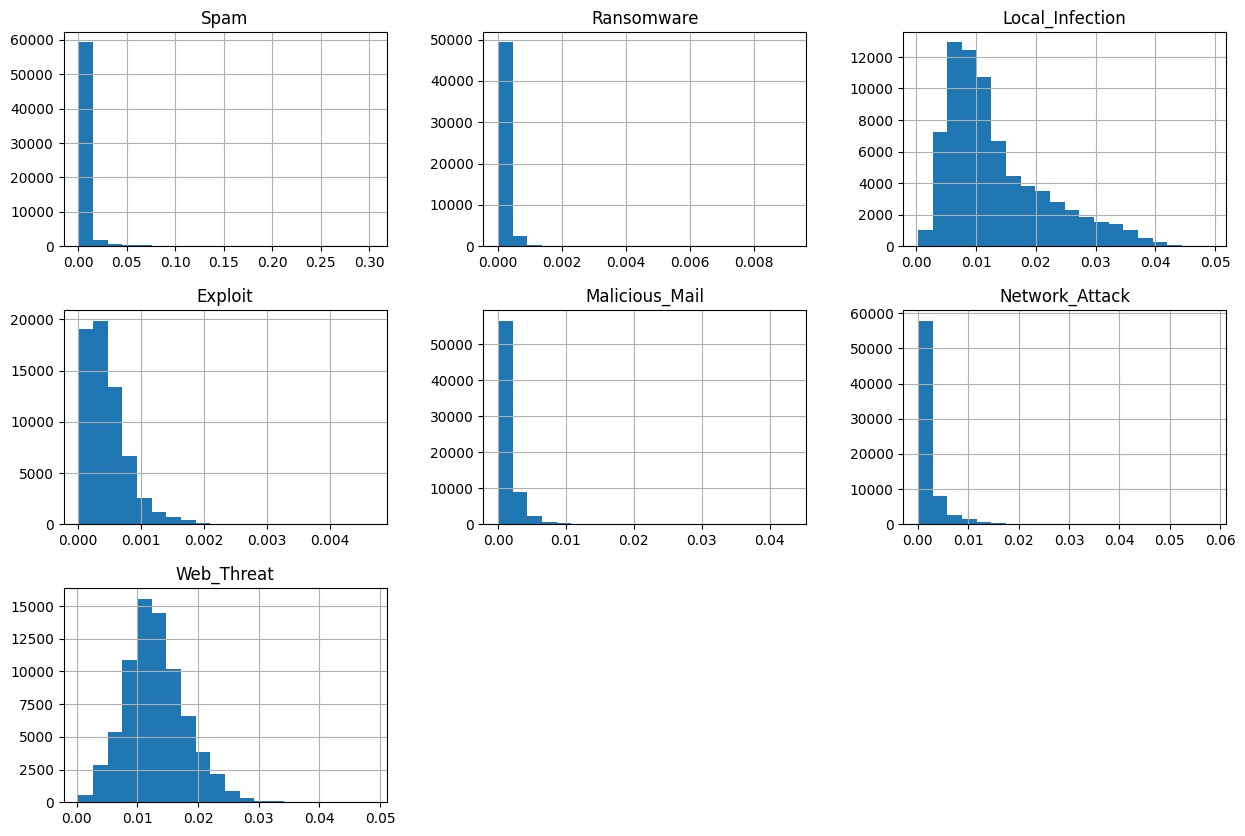

In [23]:
# Check the distributions of all variables first.
df_nulls.hist(bins = 20, figsize = (15, 10))
plt.show()

Looking at the distributions showed above, we can see that all distributions are highly skewed to the right thus using the imputation will be inappropriate here. Median imputation will be used instead.

In [24]:
# Check info prior median imputation.
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77623 entries, 0 to 77622
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AttackDate       77623 non-null  object 
 1   Country          77623 non-null  object 
 2   Spam             62982 non-null  float64
 3   Ransomware       52144 non-null  float64
 4   Local_Infection  74469 non-null  float64
 5   Exploit          64264 non-null  float64
 6   Malicious_Mail   69184 non-null  float64
 7   Network_Attack   71532 non-null  float64
 8   Web_Threat       73892 non-null  float64
dtypes: float64(7), object(2)
memory usage: 5.3+ MB


In [25]:
# Imputing using median
for col in null_list:
    median_val = df_cleaned[col].median()
    df_cleaned[col] = df_cleaned[col].fillna(median_val)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77623 entries, 0 to 77622
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AttackDate       77623 non-null  object 
 1   Country          77623 non-null  object 
 2   Spam             77623 non-null  float64
 3   Ransomware       77623 non-null  float64
 4   Local_Infection  77623 non-null  float64
 5   Exploit          77623 non-null  float64
 6   Malicious_Mail   77623 non-null  float64
 7   Network_Attack   77623 non-null  float64
 8   Web_Threat       77623 non-null  float64
dtypes: float64(7), object(2)
memory usage: 5.3+ MB


In [26]:
# Confirm if there are no nulls anymore.
df_cleaned.isnull().mean()*100

AttackDate         0.0
Country            0.0
Spam               0.0
Ransomware         0.0
Local_Infection    0.0
Exploit            0.0
Malicious_Mail     0.0
Network_Attack     0.0
Web_Threat         0.0
dtype: float64

### Feature Engineering

Since the data cleaning has been completed, we'll need to look at the following for feature engineering:
- Encoding of Country
- Date and time features creation: We can use AttackDate here and encode it by year, month, and day to see if there are seasonal patterns or trends on the attacks. We can also try to extract the day of the week and time features to know when the attacks usually happen.
- Interaction Features and Polynomial Features
    - Looking at the data that we have, there are a lot of features with extreme right-skewness which will potentially lead to a higher leverage point that skews the model's coefficients and residuals. 
    - Plan is to apply log transformation on highly skewed features and on the target variable to normalize the distributions and make the assumption of normally distributed residuals for linear regression.

##### Encoding of Country

In [27]:
# Get the count of columns to be added
data_ohe = df_cleaned.copy()
len(data_ohe['Country'].unique())-1 # k-1

224

In [28]:
# Encode the countries
country_dummies = pd.get_dummies(data_ohe['Country'], drop_first = True)
country_dummies

Antarctica  Antigua and Barbuda  Arab Republic of Egypt  \
0           False                False                    True   
1           False                False                   False   
2           False                False                   False   
3           False                False                   False   
4           False                False                   False   
...           ...                  ...                     ...   
77618       False                False                   False   
77619       False                False                   False   
77620       False                False                   False   
77621       False                False                   False   
77622       False                False                   False   

       Argentine Republic  Aruba  Bailiwick of Guernsey  Bailiwick of Jersey  \
0                   False  False                  False                False   
1                    True  False                  False                False   
2                   False   True                  False                False   
3                   False  False                   True                False   
4                   False  False                  False                 True   
...                   ...    ...                    ...                  ...   
77618               False  False                  False                False   
77619               False  False                  False                False   
77620               False  False                  False                False   
77621               False  False                  False                False   
77622               False  False                  False                False   

       Barbados  Belize  Bermuda  ...  Union of the Comoros  \
0         False   False    False  ...                 False   
1         False   False    False  ...                 False   
2         False   False    False  ...                 False   
3         False   False    False  ...                 False   
4         False   False    False  ...                 False   
...         ...     ...      ...  ...                   ...   
77618     False   False    False  ...                 False   
77619     False   False    False  ...                 False   
77620     False   False    False  ...                 False   
77621     False   False    False  ...                 False   
77622     False   False    False  ...                 False   

       United Arab Emirates  \
0                     False   
1                     False   
2                     False   
3                     False   
4                     False   
...                     ...   
77618                  True   
77619                 False   
77620                 False   
77621                 False   
77622                 False   

       United Kingdom of Great Britain and Northern Ireland  \
0                                                  False      
1                                                  False      
2                                                  False      
3                                                  False      
4                                                  False      
...                                                  ...      
77618                                              False      
77619                                               True      
77620                                              False      
77621                                              False      
77622                                              False      

       United Mexican States  United Republic of Tanzania  \
0                      False                        False   
1                      False                        False   
2                      False                        False   
3                      False                        False   
4                      False                        False   


In [29]:
# Concatenate and delete 'Country' column
df_cleaned = df_cleaned.reset_index(drop=True)
country_dummies = country_dummies.reset_index(drop=True)
df_cleaned = pd.concat([df_cleaned, country_dummies], axis=1)
df_cleaned = df_cleaned.drop('Country', axis=1)
df_cleaned


AttackDate     Spam  Ransomware  Local_Infection  Exploit  \
0      11/10/2022 0:00  0.00090     0.00013          0.01353  0.00013   
1      11/10/2022 0:00  0.00601     0.00006          0.00575  0.00035   
2      11/10/2022 0:00  0.00059     0.00007          0.01384  0.00039   
3      11/10/2022 0:00  0.00059     0.00007          0.00546  0.00273   
4      11/10/2022 0:00  0.00003     0.00007          0.00774  0.00101   
...                ...      ...         ...              ...      ...   
77618  11/12/2023 0:00  0.00064     0.00009          0.00901  0.00057   
77619  11/12/2023 0:00  0.01292     0.00003          0.00428  0.00084   
77620  11/12/2023 0:00  0.00500     0.00004          0.00870  0.00019   
77621  11/12/2023 0:00  0.00030     0.00002          0.01201  0.00031   
77622  11/12/2023 0:00  0.21790     0.00003          0.00634  0.00163   

       Malicious_Mail  Network_Attack  Web_Threat  Antarctica  \
0             0.00287         0.01007     0.01708       False   
1             0.00058         0.00095     0.00974       False   
2             0.00092         0.00129     0.00554       False   
3             0.00073         0.00091     0.01001       False   
4             0.00067         0.00129     0.01145       False   
...               ...             ...         ...         ...   
77618         0.00198         0.00149     0.01274       False   
77619         0.00021         0.00045     0.01205       False   
77620         0.00035         0.00106     0.00834       False   
77621         0.00028         0.00091     0.01145       False   
77622         0.00020         0.00111     0.00906       False   

       Antigua and Barbuda  ...  Union of the Comoros  United Arab Emirates  \
0                    False  ...                 False                 False   
1                    False  ...                 False                 False   
2                    False  ...                 False                 False   
3                    False  ...                 False                 False   
4                    False  ...                 False                 False   
...                    ...  ...                   ...                   ...   
77618                False  ...                 False                  True   
77619                False  ...                 False                 False   
77620                False  ...                 False                 False   
77621                False  ...                 False                 False   
77622                False  ...                 False                 False   

       United Kingdom of Great Britain and Northern Ireland  \
0                                                  False      
1                                                  False      
2                                                  False      
3                                                  False      
4                                                  False      
...                                                  ...      
77618                                              False      
77619                                               True      
77620                                              False      
77621                                              False      
77622                                              False      

       United Mexican States  United Republic of Tanzania  \
0                      False                        False   
1                      False                        False   
2                      False                        False   
3                      False                        False   
4                      False                        False   
...                      ...                          ...   
77618                  False                        False   
77619                  False                        False   
77620                   True                        False   
77621                  False          

##### Date and time features creation

First we need to convert AttackDate to datetime then we will extract the basic temporal features:
- Year
- Month
- Date

Then extract the time-based features:
- Day of week
- Hour
- Time of day

For Time of Day, I'll split it into the following categories and definitions:
- Morning - 5AM to before 12NN
- Afternoon - 12NN to before 5PM
- Evening - 5PM to before 9PM
- Night - 9PM to before 5AM
This segregation allows us to determine when the time of attack were and allows the model to uncover trends in the data.

In [30]:
# Convert AttackDate to datetime format
df_cleaned['AttackDate'] = pd.to_datetime(df_cleaned['AttackDate'], dayfirst = True)

In [31]:
# Basic temporal features creation
df_cleaned['Year'] = df_cleaned['AttackDate'].dt.year
df_cleaned['Month'] = df_cleaned['AttackDate'].dt.month
df_cleaned['Day'] = df_cleaned['AttackDate'].dt.day

In [32]:
# Time-based features creation

df_cleaned['Day_of_Week'] = df_cleaned['AttackDate'].dt.dayofweek
df_cleaned['Hour'] = df_cleaned['AttackDate'].dt.hour

def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
    
df_cleaned['Time_of_Day'] = df_cleaned['Hour'].apply(get_time_of_day)

In [33]:
for i in ['Year', 'Month', 'Day', 'Day_of_Week', 'Hour', 'Time_of_Day']:
    display(df_cleaned[i].value_counts())
    print('-' *100)

Year
2023    62124
2022    15499
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------


Month
11    11077
10     9535
12     8159
4      5929
1      5912
5      5729
2      5560
3      5539
7      5533
6      5328
9      4775
8      4547
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------


Day
7     2789
18    2785
11    2779
10    2779
4     2778
21    2774
28    2769
9     2769
15    2764
16    2752
6     2596
13    2589
20    2585
22    2578
19    2578
8     2577
17    2572
3     2570
27    2568
5     2401
14    2398
12    2389
24    2369
23    2367
2     2366
1     2358
29    2346
25    2175
26    1975
30    1959
31    1569
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------


Day_of_Week
0    11696
1    11500
4    11298
3    11268
2    11239
5    10496
6    10126
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------


Hour
0    77623
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------


Time_of_Day
Night    77623
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------


We can see that Hour and Time_of_Day has no categories as timestamps don't exist in the data. We should drop these along with the AttackDate column.

In [34]:
df_cleaned = df_cleaned.drop(['AttackDate', 'Hour', 'Time_of_Day'], axis=1)
df_cleaned

Spam  Ransomware  Local_Infection  Exploit  Malicious_Mail  \
0      0.00090     0.00013          0.01353  0.00013         0.00287   
1      0.00601     0.00006          0.00575  0.00035         0.00058   
2      0.00059     0.00007          0.01384  0.00039         0.00092   
3      0.00059     0.00007          0.00546  0.00273         0.00073   
4      0.00003     0.00007          0.00774  0.00101         0.00067   
...        ...         ...              ...      ...             ...   
77618  0.00064     0.00009          0.00901  0.00057         0.00198   
77619  0.01292     0.00003          0.00428  0.00084         0.00021   
77620  0.00500     0.00004          0.00870  0.00019         0.00035   
77621  0.00030     0.00002          0.01201  0.00031         0.00028   
77622  0.21790     0.00003          0.00634  0.00163         0.00020   

       Network_Attack  Web_Threat  Antarctica  Antigua and Barbuda  \
0             0.01007     0.01708       False                False   
1             0.00095     0.00974       False                False   
2             0.00129     0.00554       False                False   
3             0.00091     0.01001       False                False   
4             0.00129     0.01145       False                False   
...               ...         ...         ...                  ...   
77618         0.00149     0.01274       False                False   
77619         0.00045     0.01205       False                False   
77620         0.00106     0.00834       False                False   
77621         0.00091     0.01145       False                False   
77622         0.00111     0.00906       False                False   

       Arab Republic of Egypt  ...  United Republic of Tanzania  \
0                        True  ...                        False   
1                       False  ...                        False   
2                       False  ...                        False   
3                       False  ...                        False   
4                       False  ...                        False   
...                       ...  ...                          ...   
77618                   False  ...                        False   
77619                   False  ...                        False   
77620                   False  ...                        False   
77621                   False  ...                         True   
77622                   False  ...                        False   

       United States of America  Vatican City State  Virgin Islands  \
0                         False               False           False   
1                         False               False           False   
2                         False               False           False   
3                         False               False           False   
4                         False               False           False   
...                         ...                 ...             ...   
77618                     False               False           False   
77619                     False               False           False   
77620                     False               False           False   
77621                     False               False           False   
77622                      True               False           False   

       Virgin Islands of the United States  Åland Islands  Year  Month  Day  \
0                                    False          False  2022     10   11   
1                                    False          False  2022     10   11   
2                                    False          False  2022     10   11   
3                                    False          False  2022     10   11   
4                                    False          False  2022     10   11   
...                                    ...            ...   ...    ...  ...   
77618                                False          False  2023     12   11   
77619         

##### Interaction Features and Polynomial Features

Log Transformations

In [35]:
# Call null_list to check current list of features to apply polynomial features on
polynomial_cols = null_list
polynomial_cols

['Spam',
 'Ransomware',
 'Local_Infection',
 'Exploit',
 'Malicious_Mail',
 'Network_Attack',
 'Web_Threat']

In [36]:
log_name_list = []
for col in polynomial_cols:
    print(f'Applying log transformation to {col}')
    log_name = f'Log_{col}'
    log_name_list.append(log_name)
    df_cleaned[log_name] = np.log1p(df_cleaned[col])
print('All log transformations applied, see output table below:')
df_cleaned[log_name_list]

Applying log transformation to Spam
Applying log transformation to Ransomware
Applying log transformation to Local_Infection
Applying log transformation to Exploit
Applying log transformation to Malicious_Mail
Applying log transformation to Network_Attack
Applying log transformation to Web_Threat
All log transformations applied, see output table below:


Log_Spam  Log_Ransomware  Log_Local_Infection  Log_Exploit  \
0      0.000900         0.00013             0.013439     0.000130   
1      0.005992         0.00006             0.005734     0.000350   
2      0.000590         0.00007             0.013745     0.000390   
3      0.000590         0.00007             0.005445     0.002726   
4      0.000030         0.00007             0.007710     0.001009   
...         ...             ...                  ...          ...   
77618  0.000640         0.00009             0.008970     0.000570   
77619  0.012837         0.00003             0.004271     0.000840   
77620  0.004988         0.00004             0.008662     0.000190   
77621  0.000300         0.00002             0.011938     0.000310   
77622  0.197128         0.00003             0.006320     0.001629   

       Log_Malicious_Mail  Log_Network_Attack  Log_Web_Threat  
0                0.002866            0.010020        0.016936  
1                0.000580            0.000950        0.009693  
2                0.000920            0.001289        0.005525  
3                0.000730            0.000910        0.009960  
4                0.000670            0.001289        0.011385  
...                   ...                 ...             ...  
77618            0.001978            0.001489        0.012660  
77619            0.000210            0.000450        0.011978  
77620            0.000350            0.001059        0.008305  
77621            0.000280            0.000910        0.011385  
77622            0.000200            0.001109        0.009019  

[77623 rows x 7 columns]

In [37]:
# Now that the log transformations are applied, lets duplicate the df and drop the columns where log transformations were applied from:
df_cleaned_2 = df_cleaned.copy()

#Now lets drop polynomials columns
df_cleaned_2 = df_cleaned_2.drop(columns = polynomial_cols, axis = 1)
df_cleaned_2.columns

Index(['Antarctica', 'Antigua and Barbuda', 'Arab Republic of Egypt',
       'Argentine Republic', 'Aruba', 'Bailiwick of Guernsey',
       'Bailiwick of Jersey', 'Barbados', 'Belize', 'Bermuda',
       ...
       'Month', 'Day', 'Day_of_Week', 'Log_Spam', 'Log_Ransomware',
       'Log_Local_Infection', 'Log_Exploit', 'Log_Malicious_Mail',
       'Log_Network_Attack', 'Log_Web_Threat'],
      dtype='object', length=235)

Now that the log transformations have finished. Lets create another df as a savepoint before we create polynomial features so we can use it to loop back whenever we need it.

In [38]:
df_model_ready = df_cleaned_2.copy()
df_model_ready[log_name_list]

Log_Spam  Log_Ransomware  Log_Local_Infection  Log_Exploit  \
0      0.000900         0.00013             0.013439     0.000130   
1      0.005992         0.00006             0.005734     0.000350   
2      0.000590         0.00007             0.013745     0.000390   
3      0.000590         0.00007             0.005445     0.002726   
4      0.000030         0.00007             0.007710     0.001009   
...         ...             ...                  ...          ...   
77618  0.000640         0.00009             0.008970     0.000570   
77619  0.012837         0.00003             0.004271     0.000840   
77620  0.004988         0.00004             0.008662     0.000190   
77621  0.000300         0.00002             0.011938     0.000310   
77622  0.197128         0.00003             0.006320     0.001629   

       Log_Malicious_Mail  Log_Network_Attack  Log_Web_Threat  
0                0.002866            0.010020        0.016936  
1                0.000580            0.000950        0.009693  
2                0.000920            0.001289        0.005525  
3                0.000730            0.000910        0.009960  
4                0.000670            0.001289        0.011385  
...                   ...                 ...             ...  
77618            0.001978            0.001489        0.012660  
77619            0.000210            0.000450        0.011978  
77620            0.000350            0.001059        0.008305  
77621            0.000280            0.000910        0.011385  
77622            0.000200            0.001109        0.009019  

[77623 rows x 7 columns]

Polynomial Features

In [39]:
# Let's remove log_local_infection first from the list and name it as as polyfeatures

polyfeatures = log_name_list.copy()
polyfeatures.remove('Log_Local_Infection')
polyfeatures

['Log_Spam',
 'Log_Ransomware',
 'Log_Exploit',
 'Log_Malicious_Mail',
 'Log_Network_Attack',
 'Log_Web_Threat']

In [40]:
# Initialize the transformer
poly = PolynomialFeatures(degree = 2, include_bias = False)

# Fit and transform the data
X_poly =poly.fit_transform(df_model_ready[polyfeatures])
poly_feature_names = poly.get_feature_names_out(polyfeatures)
df_poly_features = pd.DataFrame(X_poly, columns=poly_feature_names, index=df_model_ready.index)

print(f"Generated {len(poly_feature_names)} new polynomial and interaction features.")

Generated 27 new polynomial and interaction features.


### Model Building and Training

Data Preparation for Modelling

In [41]:
# Define target
target_col = 'Log_Local_Infection'
target_col

'Log_Local_Infection'

In [42]:
# Separate the target from the dataset
y = df_model_ready[target_col]
y

0        0.013439
1        0.005734
2        0.013745
3        0.005445
4        0.007710
           ...   
77618    0.008970
77619    0.004271
77620    0.008662
77621    0.011938
77622    0.006320
Name: Log_Local_Infection, Length: 77623, dtype: float64

In [43]:
# Separate features
X_base = df_model_ready.drop(columns=[target_col])
log_cols_to_drop = [col for col in X_base.columns if col.startswith('Log_')]
X_base_dropped = X_base.drop(columns=log_cols_to_drop)
X_base_dropped

Antarctica  Antigua and Barbuda  Arab Republic of Egypt  \
0           False                False                    True   
1           False                False                   False   
2           False                False                   False   
3           False                False                   False   
4           False                False                   False   
...           ...                  ...                     ...   
77618       False                False                   False   
77619       False                False                   False   
77620       False                False                   False   
77621       False                False                   False   
77622       False                False                   False   

       Argentine Republic  Aruba  Bailiwick of Guernsey  Bailiwick of Jersey  \
0                   False  False                  False                False   
1                    True  False                  False                False   
2                   False   True                  False                False   
3                   False  False                   True                False   
4                   False  False                  False                 True   
...                   ...    ...                    ...                  ...   
77618               False  False                  False                False   
77619               False  False                  False                False   
77620               False  False                  False                False   
77621               False  False                  False                False   
77622               False  False                  False                False   

       Barbados  Belize  Bermuda  ...  United Republic of Tanzania  \
0         False   False    False  ...                        False   
1         False   False    False  ...                        False   
2         False   False    False  ...                        False   
3         False   False    False  ...                        False   
4         False   False    False  ...                        False   
...         ...     ...      ...  ...                          ...   
77618     False   False    False  ...                        False   
77619     False   False    False  ...                        False   
77620     False   False    False  ...                        False   
77621     False   False    False  ...                         True   
77622     False   False    False  ...                        False   

       United States of America  Vatican City State  Virgin Islands  \
0                         False               False           False   
1                         False               False           False   
2                         False               False           False   
3                         False               False           False   
4                         False               False           False   
...                         ...                 ...             ...   
77618                     False               False           False   
77619                     False               False           False   
77620                     False               False           False   
77621                     False               False           False   
77622                      True               False           False   

       Virgin Islands of the United States  Åland Islands  Year  Month  Day  \
0                                    False          False  2022     10   11   
1                                    False          False  2022     10   11   
2                                    False          False  2022     10   11   
3                                    False          False  2022     10   11   
4                                    False          False  2022     10   11   
...                                    ...            ...   ...    ...  ...   
77618 

In [44]:
# Concat cleaned base data with new polynomial features
X = pd.concat([X_base_dropped, df_poly_features], axis=1)
print(f"Final Predictor Matrix (X) Shape: {X.shape}")
X.head(10)

Final Predictor Matrix (X) Shape: (77623, 255)


Antarctica  Antigua and Barbuda  Arab Republic of Egypt  \
0       False                False                    True   
1       False                False                   False   
2       False                False                   False   
3       False                False                   False   
4       False                False                   False   
5       False                False                   False   
6       False                False                   False   
7       False                False                   False   
8       False                False                   False   
9       False                False                   False   

   Argentine Republic  Aruba  Bailiwick of Guernsey  Bailiwick of Jersey  \
0               False  False                  False                False   
1                True  False                  False                False   
2               False   True                  False                False   
3               False  False                   True                False   
4               False  False                  False                 True   
5               False  False                  False                False   
6               False  False                  False                False   
7               False  False                  False                False   
8               False  False                  False                False   
9               False  False                  False                False   

   Barbados  Belize  Bermuda  ...  Log_Exploit^2  \
0     False   False    False  ...   1.689780e-08   
1     False   False    False  ...   1.224571e-07   
2     False   False    False  ...   1.520407e-07   
3     False   False    False  ...   7.432604e-06   
4     False   False    False  ...   1.019071e-06   
5      True   False    False  ...   3.718731e-07   
6     False    True    False  ...   1.763259e-07   
7     False   False    False  ...   1.088641e-07   
8     False   False    False  ...   2.559590e-08   
9     False   False    False  ...   1.023672e-07   

   Log_Exploit Log_Malicious_Mail  Log_Exploit Log_Network_Attack  \
0                    3.725414e-07                    1.302468e-06   
1                    2.029056e-07                    3.322840e-07   
2                    3.585651e-07                    5.026778e-07   
3                    1.989459e-06                    2.479787e-06   
4                    6.761320e-07                    1.301403e-06   
5                    4.450018e-07                    1.492217e-06   
6                    1.175589e-07                    5.878354e-08   
7                    1.748248e-07                    2.501380e-06   
8                    7.342536e-07                    2.078483e-07   
9                    3.519243e-08                    5.438668e-08   

   Log_Exploit Log_Web_Threat  Log_Malicious_Mail^2  \
0                    0.000002          8.213322e-06   
1                    0.000003          3.362050e-07   
2                    0.000002          8.456220e-07   
3                    0.000027          5.325112e-07   
4                    0.000011          4.485994e-07   
5                    0.000010          5.325112e-07   
6                    0.000008          7.837805e-08   
7                    0.000005          2.807512e-07   
8                    0.000003          2.106307e-05   
9                    0.000002          1.209867e-08   

   Log_Malicious_Mail Log_Network_Attack  Log_Malicious_Mail Log_Web_Threat  \
0                           2.871517e-05                       4.853606e-05   
1                           5.505788e-07                       5.620236e-06   
2                           1.185490e-06                       5.080397e-06   
3                           6.637557e-07                       7.268317e-06   
4                           8.634538e-07                       7.625359e-06   
5                           1.785661e-06                       1.15474

Train/Test Split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Feature Scaling

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data split and scaled successfully.")

Data split and scaled successfully.


Model Training

In [47]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
print("Training completed.")

Training completed.


### Initial Evaluation and Iteration

In [48]:
y_pred_test = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"\n--- Model Performance on Test Set ---")
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


--- Model Performance on Test Set ---
R-squared (R²): 0.8486
Root Mean Squared Error (RMSE): 0.0032


Looking at the results, we can see that the R squared is 0.8486 indicating that the log-transformed dataset worked well as the skewness was addressed which lead to a more stable model and the polynomial features allowed the model to fit the non-linear curved relationship identified in the boxplots - both of these steps resulted to the model capturing around 84.86% of the variance.

To further understand the result, we must check the biggest drivers to also know which attack type has the highest positive coefficient as this will be the primary driver of infection.

In [49]:
feature_names = X.columns
coefficients = model.coef_
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df

Feature  Coefficient
0                               Antarctica    -0.000004
1                      Antigua and Barbuda    -0.000022
2                   Arab Republic of Egypt    -0.000174
3                       Argentine Republic    -0.000087
4                                    Aruba     0.000041
..                                     ...          ...
250  Log_Malicious_Mail Log_Network_Attack    -0.000508
251      Log_Malicious_Mail Log_Web_Threat    -0.001194
252                   Log_Network_Attack^2    -0.001102
253      Log_Network_Attack Log_Web_Threat    -0.000263
254                       Log_Web_Threat^2    -0.004024

[255 rows x 2 columns]

In [50]:
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
top_impact_features = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)
print("Top 10 Impactful Drivers")
print(top_impact_features.head(10))

Top 10 Impactful Drivers
                 Feature  Coefficient  Absolute_Coefficient
233       Log_Web_Threat     0.008030              0.008030
254     Log_Web_Threat^2    -0.004024              0.004024
230          Log_Exploit     0.002714              0.002714
232   Log_Network_Attack     0.002608              0.002608
231   Log_Malicious_Mail     0.002549              0.002549
111    Republic of Benin     0.001476              0.001476
209    Togolese Republic     0.001433              0.001433
114  Republic of Burundi     0.001350              0.001350
12          Burkina Faso     0.001342              0.001342
211         Turkmenistan     0.001333              0.001333


Looking at the top drivers, we can definitely see that the Log Web Threat and its power of 2 counterpart drives the local infection rate higher abd we can definitely see it as a main driver given the gap between the coefficient values to the third one.

We can conclude that most of the attacks that drive the local infection rate higher are internet-borne risks as seen with Web Threats and its understandable given that most of the successful web threat attacks likely bore from individuals with lesser digital security literacy which leads to their devices getting compromised.

Looking into the other attack drivers, we can definitely see that the range is between 0.0025-0.0027 and these attacks are on the software and hardware side which requires an advanced understanding of the systems in order for a successful attack to be done. We can also see that malicious mail is also one of the top drivers, while this can be related to web threats due to phishing, the variable was left as is to further check if these social engineering attacks pose a higher risks as compared to the other attacks. 

There are also a few countries included in the top drivers and upon checking, these are developing countries. Most of these are African Countries which are seeing a rapid growth in internet and mobile use in the past few years but the fast digital transformation is outpaced by the development of adequate security measures which makes these countries prime targets of attacks. 

Given the low cybersecurity maturity, this makes them susceptible targets to cyber attacks such as:
- Online Scams and Phishing
- Malware and Ransomware
- and Business Email Compromise

Some attacks confirmed by other studies in the International Analytics Group of PT Cyber Analytics
[as seen here.](https://global.ptsecurity.com/en/research/analytics/cybersecurity-threatscape-for-african-countries-q1-2023-q3-2024/). We can see that while the metrics did not make any mention of said countries, given that these are the top in the said market, these likely reflect in the other countries that weren't mentioned.

We can also see in the [Global Cybersecurity Index (GCI)](https://www.itu.int/epublications/publication/global-cybersecurity-index-2024) from ITU that the Republic of Burundi was ranked in one of the lowest tiers which further supports our findings. 

Turkmenistan came in as the 10th driver but this could be due to the idea of it being a developing region, the institutional fragmentation leads to lesser capacity to handle incidents. 

Looking at the impactful drivers, we can definitely say that most of the attacks are highly centered on web threats which indicates that there should be a push to make the public more digitally literate in terms of handling these items. The findings also show that there should be a stricter implementation in cybersecurity for both hardware and software alike to ensure that these will be less likely to be compromised. 

While most of the drivers tackled are from the top 10 only, it is important to still ensure that the security is enough to handle other cyber attacks as it is possible and given that the continuing rise in AI is very rapid, along comes the risk of attacks that may stem from it be it driven by ill interest or use of AI to learn how to attack certain systems or demographics. It is best to be literate even on the basics rather than not being literate at all because while we are building smart systems, we must ensure that the user, be it an end-user or not, is also smart when they are utilizing such tools.


### Final Evaluation, Driver Analysis, and Recommendations

The Multiple Linear Regression model, leveraging log-transformed and polynomial features, achieved an R-squared (R 
2
 ) of 0.8486 on the test set. This confirms that the model successfully explains approximately 85% of the variance in the log-transformed local infection rate, validating the entire feature engineering strategy (Log Transformation and Polynomial terms).

##### The Top 10 Impactful Drivers
The following table presents the features with the largest absolute coefficients, indicating the strongest positive (or negative, in the case of the squared term) influence on the Log_Local_Infection rate.

In [51]:
display(top_impact_features.head(10))

Feature  Coefficient  Absolute_Coefficient
233       Log_Web_Threat     0.008030              0.008030
254     Log_Web_Threat^2    -0.004024              0.004024
230          Log_Exploit     0.002714              0.002714
232   Log_Network_Attack     0.002608              0.002608
231   Log_Malicious_Mail     0.002549              0.002549
111    Republic of Benin     0.001476              0.001476
209    Togolese Republic     0.001433              0.001433
114  Republic of Burundi     0.001350              0.001350
12          Burkina Faso     0.001342              0.001342
211         Turkmenistan     0.001333              0.001333

Below are the assessments of each driver with the findings after checking the domain as refence.

1. **Log_Web_Threat**: +0.008030, **Highest Positive Driver**. The single strongest predictor, indicating a direct relationship with successful local infections.
2. **Log_Web_Threat2**: -0.004024, **Non-Linear Effect**. A high magnitude confirms the non-linear relationship, suggesting a diminishing return on impact at extremely high volumes of web threats.
3. **Log_Exploit**: +0.002714, **Software Vulnerability**. Direct attacks targeting system weaknesses are highly effective.
4. **Log_Network_Attack**: +0.002608, **Perimeter Threats**. Significant driver from infrastructure-level attacks.
5. **Log_Malicious_Mail**: +0.002549, **Social Engineering**. Highlights the persistent success of phishing and email-borne malware.
6. **Republic of Benin**: +0.001476, **Geographical Factor**. Vulnerability linked to low maturity.
7. **Togolese Republic**: +0.001433, **Geographical Factor**. Vulnerability linked to low maturity.
8. **Republic of Burundi**: +0.001350, **Geographical Factor**. Vulnerability linked to low maturity.
9. **Burkina Faso**: +0.001342, **Geographical Factor**. Vulnerability linked to low maturity.
10. **Turkmenistan**: +0.001333, **Geographical Factor**. Vulnerability linked to developing region status.

#### Dominance of Web Threats (User-driven Risk) 

The model confirms that Web Threats are the primary attack vector, leading to the highest local infection rate. Given the significant gap between the coefficient of Log_Web_Threat (+0.0080) and the next largest attack type (Log_Exploit at +0.0027), we conclude that the most successful attacks are internet-borne risks that often rely on a user's lack of digital security literacy (e.g., clicking on phishing links, visiting malicious sites) to compromise the device.

#### Consistency of Technical Attacks

While Web Threats dominate, the clusters of Log_Exploit, Log_Network_Attack, and Log_Malicious_Mail (ranging from 0.0025 to 0.0027) confirm that attacks on the software/hardware layer requiring advanced understanding remain a significant, sustained threat.

#### Geographical Vulnerability and Low Maturity

The presence of multiple developing countries (e.g., Republic of Benin, Republic of Burundi, Togolese Republic) among the top drivers points to a critical systemic vulnerability. This finding is supported by external data:
- These regions are experiencing rapid digital transformation which has outpaced the development of robust security measures and user education.

- The Global Cybersecurity Index (GCI) from the ITU often ranks these nations in lower tiers than T1, supporting the model's conclusion that low cybersecurity maturity is directly correlated with a higher baseline rate of successful infections. We can also see that while the Republic of Benin and Togolese Republic are in the T2 or advancing tier, it is in our top impactful drivers as we expect that with more awareness and efforts to improve security, it is possible that the infection rate gets higher due to increased detection efforts. The important idea here is that they are moving toward advancing their security.


Policy and Strategic Implications


The findings from this Multiple Linear Regression model translate into clear action items for cybersecurity strategy:

1. Prioritize Digital Literacy: The overwhelming impact of Log_Web_Threat necessitates a global push for basic digital security education for end-users. This represents the most effective mitigation strategy against the largest single driver of infection.

2. Strengthen Base Defenses: Strict implementation of cybersecurity principles for both hardware and software development is required to reduce the effectiveness of Log_Exploit and Log_Network_Attack.

3. Future-Proofing: While the current drivers are clear, the rapid development of AI-driven attacks means organizations must ensure security baselines are robust enough to handle new threats that learn to target systems or demographics. Security must be continuously evolved to match the sophistication of emerging tools.


To further check the other features where there can be improvements on (as it is important to cover all bases too not just those in the top features), here are the top 50 features.

In [52]:
display(top_impact_features.head(50))

Feature  Coefficient  \
233                                     Log_Web_Threat     0.008030   
254                                   Log_Web_Threat^2    -0.004024   
230                                        Log_Exploit     0.002714   
232                                 Log_Network_Attack     0.002608   
231                                 Log_Malicious_Mail     0.002549   
111                                  Republic of Benin     0.001476   
209                                  Togolese Republic     0.001433   
114                                Republic of Burundi     0.001350   
12                                        Burkina Faso     0.001342   
211                                       Turkmenistan     0.001333   
116                               Republic of Cameroon     0.001195   
251                  Log_Malicious_Mail Log_Web_Threat    -0.001194   
23                  Congo (Democratic Republic of the)     0.001164   
183                              Republic of the Congo     0.001136   
136                          Republic of Guinea-Bissau     0.001105   
252                               Log_Network_Attack^2    -0.001102   
151                                   Republic of Mali     0.001083   
15                            Central African Republic     0.001075   
135                                 Republic of Guinea     0.001047   
125                          Republic of Côte d'Ivoire     0.001031   
189                   Republic of the Union of Myanmar     0.001023   
158                                  Republic of Niger     0.001017   
117                                   Republic of Chad     0.000987   
245                                      Log_Exploit^2    -0.000966   
143                             Republic of Kazakhstan     0.000957   
60                     Islamic Republic of Afghanistan     0.000948   
166                                Republic of Senegal     0.000933   
165                                 Republic of Rwanda     0.000928   
178                             Republic of Uzbekistan     0.000893   
62                      Islamic Republic of Mauritania     0.000857   
248                         Log_Exploit Log_Web_Threat    -0.000836   
84                    Lao People's Democratic Republic     0.000787   
83                                     Kyrgyz Republic     0.000783   
228                                           Log_Spam     0.000749   
129                      Republic of Equatorial Guinea     0.000743   
97             People's Democratic Republic of Algeria     0.000734   
67                                               Japan    -0.000731   
224                                               Year     0.000728   
218                        United Republic of Tanzania     0.000718   
16                     Co-operative Republic of Guyana    -0.000695   
7                                             Barbados    -0.000692   
227                                        Day_of_Week     0.000687   
106                                 Republic of Angola     0.000664   
198                                        South Sudan     0.000634   
54   Hong Kong Special Administrative Region of the...    -0.000632   
169                           Republic of Sierra Leone     0.000619   
102                            Principality of Andorra    -0.000581   
155                             Republic of Mozambique     0.000578   
119                         Republic of China (Taiwan)    -0.000578   
249                               Log_Malicious_Mail^2    -0.000577   

     Absolute_Coefficient  
233              0.008030  
254              0.004024  
230              0.002714  
232              0.002608  
231              0.002549  
111              0.001476  
209              0.001433  
114              0.001350  
12               0.001342  
211              0.001333  
116              0.001195  
251              0.001194  
23               0.001164  
183              0.001136  
136  

To visualize:

In [53]:
y_pred_test = model.predict(X_test_scaled)
y_test_array = np.array(y_test)

Predicted vs. Actual plot saved as predicted_vs_actual_fit.png


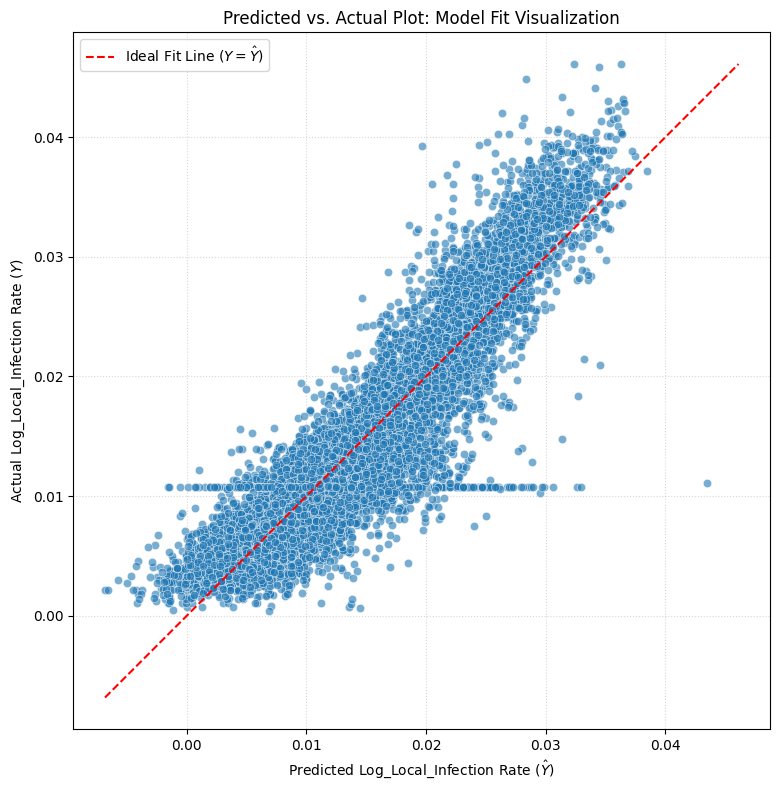

In [54]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_pred_test, y=y_test_array, alpha=0.6)
max_val = max(y_test_array.max(), y_pred_test.max())
min_val = min(y_test_array.min(), y_pred_test.min())

plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', 
         label='Ideal Fit Line ($Y=\hat{Y}$)')

plt.title('Predicted vs. Actual Plot: Model Fit Visualization')
plt.xlabel('Predicted Log_Local_Infection Rate ($\hat{Y}$)')
plt.ylabel('Actual Log_Local_Infection Rate ($Y$)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.savefig('predicted_vs_actual_fit.png')
print("Predicted vs. Actual plot saved as predicted_vs_actual_fit.png")

While the tight clustering of data points along the red diagonal line confirm the prediction capability of the model, it is worth remembering that local infection rate is measured after the on demand scan. Given the current environment, the features actually drive the prediction to have a statistical baseline for what the log-transformed local infection rate should be. The line can be used as the statistical risk to understand which are the severe attacks that will appear as the outliers. 

We can see in the chart that those who are really far from the line are where the highest residuals are. These signal events where the infection rate was far higher than what the original model has expected based on known factors. The recommendations is to dive into these to fully understand where should the improvements be and to know if these are zero-day attacks or new threats that should be explored to know how to defend against it in the future.

Since we added a new evaluation metric in the advanced regression, lets add the same metric here for comparison purposes as well as to check MAE for this model.

In [56]:
# Copying the same code plus the new metric:
from sklearn.metrics import mean_absolute_error
y_pred_test = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae = mean_absolute_error(y_test, y_pred_test)

print(f"\n--- Model Performance on Test Set ---")
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


--- Model Performance on Test Set ---
R-squared (R²): 0.8486
Root Mean Squared Error (RMSE): 0.0032
Mean Absolute Error (MAE): 0.0023
